client_data.csv

●	id = client company identifier
●	activity_new = category of the company’s activity
●	channel_sales = code of the sales channel
●	cons_12m = electricity consumption of the past 12 months
●	cons_gas_12m = gas consumption of the past 12 months
●	cons_last_month = electricity consumption of the last month
●	date_activ = date of activation of the contract
●	date_end = registered date of the end of the contract
●	date_modif_prod = date of the last modification of the product
●	date_renewal = date of the next contract renewal
●	forecast_cons_12m = forecasted electricity consumption for next 12 months
●	forecast_cons_year = forecasted electricity consumption for the next calendar year
●	forecast_discount_energy = forecasted value of current discount
●	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
●	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
●	forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
●	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
●	has_gas = indicated if client is also a gas client
●	imp_cons = current paid consumption
●	margin_gross_pow_ele = gross margin on power subscription
●	margin_net_pow_ele = net margin on power subscription
●	nb_prod_act = number of active products and services
●	net_margin = total net margin
●	num_years_antig = antiquity of the client (in number of years)
●	origin_up = code of the electricity campaign the customer first subscribed to
●	pow_max = subscribed power
●	churn = has the client churned over the next 3 months

price_data.csv

●	id = client company identifier
●	price_date = reference date
●	price_off_peak_var = price of energy for the 1st period (off peak)
●	price_peak_var = price of energy for the 2nd period (peak)
●	price_mid_peak_var = price of energy for the 3rd period (mid peak)
●	price_off_peak_fix = price of power for the 1st period (off peak)
●	price_peak_fix = price of power for the 2nd period (peak)
●	price_mid_peak_fix = price of power for the 3rd period (mid peak)

Note: some fields are hashed text strings. 
This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power


In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Import the neccessary modules for data manipulation and visual representation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
#import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from matplotlib import pyplot
import seaborn as sns
import missingno as msno
#import plotly.plotly as plt
from sklearn.metrics import accuracy_score,average_precision_score,recall_score,confusion_matrix
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
#style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# importing libraries for data handling and analysis
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# importing libraries for data visualisations
from chart_studio import plotly
import chart_studio.plotly as py
import matplotlib.pylab as pylab
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly.offline as pyoff
#from plotly import plotly as py
import plotly as py
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
#py.init_notebook_mode()
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

# Sub-Task 1

* Perform some exploratory data analysis. 
Look into the data types, data statistics, specific parameters, and variable distributions. 
* This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

In [2]:
client_data = pd.read_csv(r'C:\Users\HP\Desktop\T&C Development\Graduate Program\Forage Projects\My BCG\client_data.csv')
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


# EDA

In [3]:
# Shape of the data
print("The shape of this dataframe is {}".format(client_data.shape))

The shape of this dataframe is (14606, 26)


In [4]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [5]:
# convert datetime feature to datetime data type
for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_data[f] = pd.to_datetime(client_data[f])

In [6]:
#Renaming some columns for easy understanding 
# Add some new features from the above datetime features
client_data['contract_start_year'] = client_data['date_activ'].dt.year
client_data['contract_end_year'] = client_data['date_end'].dt.year
client_data['Last_mod_year'] = client_data['date_modif_prod'].dt.year

In [7]:
date_data = client_data.head()

In [8]:
date_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year,Last_mod_year
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2013,2016,2015
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2009,2016,2009
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2010,2016,2010
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2010,2016,2010
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,2010,2016,2010


In [9]:
date_df = date_data[['contract_start_year','contract_end_year', 'Last_mod_year']].copy()
date_df.head()

,contract_start_year,contract_end_year,Last_mod_year
0,2013,2016,2015
1,2009,2016,2009
2,2010,2016,2010
3,2010,2016,2010
4,2010,2016,2010


In [10]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   contract_start_year  5 non-null      int64
 1   contract_end_year    5 non-null      int64
 2   Last_mod_year        5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


In [11]:
# define a function to display missing values and dupliate rows
def duplicate_and_missing(dataset, dataset_name):  
    print('There are', dataset.shape[0], 'rows and', dataset.shape[1], 'columns in the dataset', '"'+dataset_name+'"','\n'+'--'*40)
    # display missing values
    if dataset.isna().sum().sum()!=0:  # if there is missing values
        missing_value = dataset.isna().sum()[dataset.isna().sum()!=0].to_frame(name='count')
        missing_value['proportion'] = missing_value['count']/len(dataset)
        print('There are', dataset.isna().sum().sum(), 'missing values')
        print(missing_value, '\n'+'--'*40)
    else:
        print('There is no missing value')
    # display duplicate rows
    if dataset.duplicated().sum()!=0:
        print('There are', dataset.duplicated().sum(), 'duplicate rows\n')
    else:
        print('There is no duplicate row\n')

In [12]:
duplicate_and_missing(dataset=client_data, dataset_name='client_data')

There are 14606 rows and 29 columns in the dataset "client_data" 
--------------------------------------------------------------------------------
There is no missing value
There is no duplicate row



In [13]:
# Find out the categorical and numerical variables so we can sort out the outliers in numerical data
def describe_categorical(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes=='object'].index.tolist()
    if len(cat_columns)!=0:
        print('Categorical variables are', cat_columns,'\n'+'=='*40)
        for cat in cat_columns:
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
    else:
        print('There is no categorical variables in the dataset')

In [14]:
describe_categorical(dataset=client_data)

Categorical variables are ['id', 'channel_sales', 'has_gas', 'origin_up'] 
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d      1    0.000068
1      ab250252dfaded1c9a54834f9c829b43      1    0.000068
2      ab32c3a8d93c88b485499566526cb34d      1    0.000068
3      ab3392ec2bfd3605624f31d3c6828c21      1    0.000068
4      ab346731fef5aa291919ea43e45af5a7      1    0.000068
...                                 ...    ...         ...
14601  55091aace7bd0fadd194f46cb4886fea      1    0.000068
14602  550b8d2f9c298abd8f05fca3bc1a13c4      1    0.000068
14603  5514b18508f378a39f41657554aa72e3      1    0.000068
14604  551cb1b1faf72259c2c182dedec12c98      1    0.000068
14605  ffff7fa066f1fb305ae285bb03bf325a      1    0.000068

[14606 rows x 3 columns] 
--------------------------------------------------------------------------------
                      channel_sales  count  proportion
0  foosdfpfkusacimwkcsosbicdxkicaua   6754    0.462413

The values of "channel_sales" and "origin_up" are not understandable, so I convert these features to numeric data type by label encoding.

In [15]:
# label encoding
from sklearn.preprocessing import LabelEncoder
channel_encoder = LabelEncoder()
client_data['channel_sales'] = channel_encoder.fit_transform(client_data['channel_sales'])
origin_encoder = LabelEncoder()
client_data['origin_up'] = origin_encoder.fit_transform(client_data['origin_up'])

In [16]:
# Let's check out the numerical features
# dataset: a pandas dataframe;
def describe_numeric(dataset):
    # for numeric columns whose values are discrete, display values and their frequency
    int_columns = dataset.dtypes[dataset.dtypes=='int'].index.tolist()
    # for numeric columns whose values are continuous, plot their value distribution
    float_columns = dataset.dtypes[dataset.dtypes=='float'].index.tolist()
    if len(int_columns)+len(float_columns)!=0:
        print('Numeric variables are', int_columns+float_columns,'\n'+'=='*40)
        # integer numeric feature
        if len(int_columns)!=0:    
            for cat in int_columns:
                describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count']/len(dataset)
                print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
        # 
        print(dataset[int_columns + float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}), '\n'+'--'*40)
    else:
        print('There is no numeric variables in the dataset')

In [17]:
describe_numeric(dataset=client_data)

Numeric variables are ['channel_sales', 'origin_up', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max'] 
   channel_sales  count  proportion
0              4   6754    0.462413
1              0   3725    0.255032
2              5   1843    0.126181
3              7   1375    0.094139
4              2    893    0.061139
5              6     11    0.000753
6              1      3    0.000205
7              3      2    0.000137 
--------------------------------------------------------------------------------
   origin_up  count  proportion
0          4   7097    0.485896
1          2   4294    0.293989
2          3   3148    0.215528
3          0     64    0.004382
4          5      2    0.000137
5          1      1    0.000068 
-------------------------------------------------------------

In [18]:
client_data[client_data.dtypes[client_data.dtypes=='datetime64[ns]'].index.tolist()].describe(datetime_is_numeric=True)

,date_activ,date_end,date_modif_prod,date_renewal
count,14606,14606,14606,14606
mean,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488
min,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00
25%,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00
50%,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00
75%,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


In [19]:
cat_cols = ['id', 'channel_sales', 'has_gas', 'origin_up'] 
num_cols = ['channel_sales', 'origin_up', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']
print("categorical columns are:", cat_cols)
print("numerical columns are:", num_cols)

categorical columns are: ['id', 'channel_sales', 'has_gas', 'origin_up']
numerical columns are: ['channel_sales', 'origin_up', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']


In [20]:
#We only need the statistical analytics of numerical variables, hence we will sort out the continous variables
# Continous Columns Name
num_cols = ['channel_sales', 'origin_up', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']
client_data[num_cols].describe()

,channel_sales,origin_up,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,3.266945,3.178899,1868.614880,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,189.264522,18.135136
std,2.183223,0.887801,2387.571531,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,311.798130,13.534743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000
25%,0.000000,2.000000,494.995000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,50.712500,12.500000
50%,4.000000,3.000000,1112.875000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,112.530000,13.856000
75%,4.000000,4.000000,2401.790000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,243.097500,19.172500
max,7.000000,5.000000,82902.830000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,24570.650000,320.000000


In [21]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year,Last_mod_year
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,4,43.648,1,2013,2016,2015
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,2,13.800,0,2009,2016,2009
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,2,13.856,0,2010,2016,2010
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,2,13.200,0,2010,2016,2010
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,2,19.800,0,2010,2016,2010


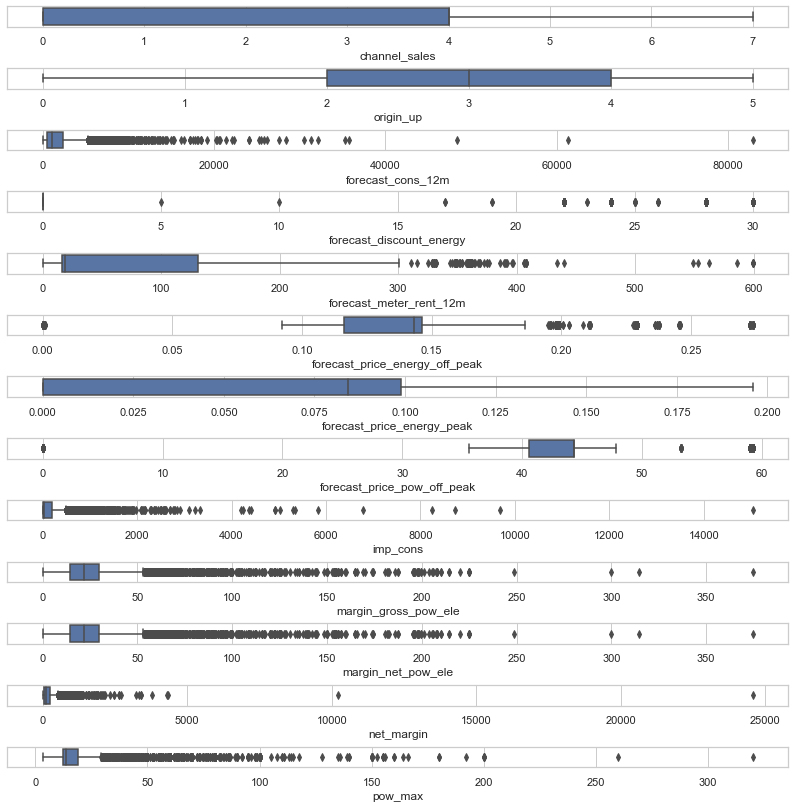

In [22]:
fig , ax = plt.subplots(ncols=1,nrows=len(num_cols))
fig.set_figheight(14)
fig.set_figwidth(14)
for i in range(len(num_cols)):
    sns.boxplot(client_data[num_cols[i]],ax=ax[i])
plt.subplots_adjust(hspace=2)
plt.show()

* There are outliers in the data

In [23]:
df2 = client_data[num_cols]
df2.head()

,channel_sales,origin_up,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max
0,4,4,0.00,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,678.99,43.648
1,0,2,189.95,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,18.89,13.800
2,4,2,47.96,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,6.60,13.856
3,5,2,240.04,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,25.46,13.200
4,0,2,445.75,0.0,131.73,0.116900,0.100015,40.606701,52.32,44.91,44.91,47.98,19.800


# DROP OUTLIER FROM CONTINOUS COLUMNS
It could be seen that we have outlier so we need to get rid of them

In [25]:
# There are outliers, let's try to handle them
# IQR Method
for i in df2.columns:
    q1 = df2[i].quantile(0.25)    # we are getting 25th percentile if i.th variable
    q3 = df2[i].quantile(0.75)    # we are getting 75th percentile if i.th variable
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    
    df2[i] = df2[i].replace(df2[df2[i] > ub][i].values,df2[i].quantile(0.99))  # replacing outliers with 99th percentile as no
                                                                   # outliers can be over it or we can put accordingly.
    df2[i] = df2[i].replace(df2[df2[i] < lb][i].values,df2[i].quantile(0.01))  # replacing outliers with 1st percentile as no
                                                                   # outliers can be below it or we can put accordingly.

# SHOW COLUMNS AFTER DROP OUTLIER

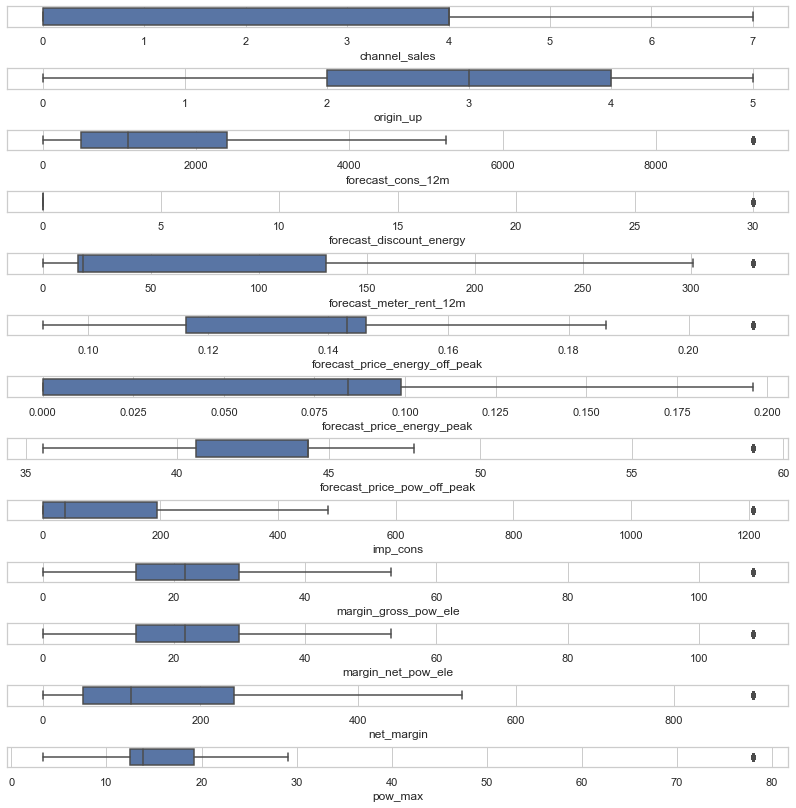

In [26]:
fig , ax = plt.subplots(ncols=1,nrows=len(num_cols))
fig.set_figheight(14)
fig.set_figwidth(14)
for i in range(len(num_cols)):
    sns.boxplot(df2[num_cols[i]],ax=ax[i])
plt.subplots_adjust(hspace=2)
plt.show()

# Churn Rate
* Churn rate is the rate at which customers stop doing business with a company over a given period of time.
    * Retained = 0
    * Churn = 1

Target Variable: churn
    
> The feature 'churn' is what this Machine Learning problem is about. 
> We are trying to predict the value of the feature 'churn' by using other related features associated with the clients and price data.

In [34]:
client_data.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year,Last_mod_year
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,4,43.648,1,2013,2016,2015
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,2,13.800,0,2009,2016,2009


In [35]:
# About 90% are in the Not churn category and 10% are churned(i.e stopped doing business). 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
churn_rate = client_data.churn.value_counts() / 14606
churn_rate

0    0.902848
1    0.097152
Name: churn, dtype: float64

In [36]:
client_data['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

In [37]:
colors = ['gold', 'mediumturquoise']
labels = ['Retained','churn']
values = client_data['churn'].value_counts()/client_data['churn'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Churn vs Retained",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

* In the last 3 months 13187 customers are retained
* There are currently 1419 are churned
* Customer retention is 90% in the last 3 months
* Customer attrition is 10% in the last 3 months

# Channel sales
This has been categorized to numbers for easy understanding

In [38]:
#Checking for various channel_sales
client_data['channel_sales'].value_counts()

4    6754
0    3725
5    1843
7    1375
2     893
6      11
1       3
3       2
Name: channel_sales, dtype: int64

No handles with labels found to put in legend.


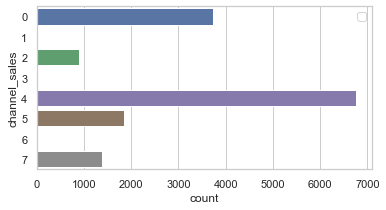

In [39]:
## We can also use bar plots instead
plt.figure(figsize=(6,3))
sns.countplot(y='channel_sales', data=client_data)
plt.legend()

The 4th channel sales is the highest 

# has_gas 
    : This indicates if client is a gas client or not

In [40]:
client_data['has_gas'].value_counts()

f    11955
t     2651
Name: has_gas, dtype: int64

In [41]:
x = [(client_data.has_gas.value_counts(normalize=True)[1]*100), (client_data.has_gas.value_counts(normalize=True)[0]*100)]

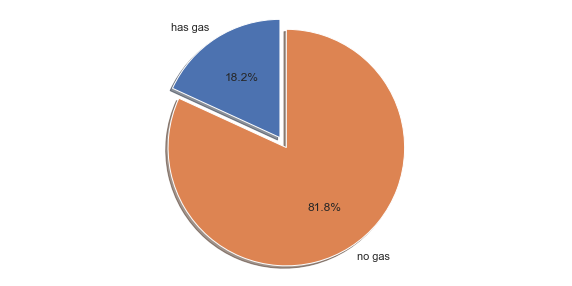

In [42]:
labels = 'has gas', 'no gas'
sizes = x
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

* More than 80 % of the customers have not subscribed to gas

# Creating a new dataframe with only the datetime variables

In [43]:
date_df.head()

,contract_start_year,contract_end_year,Last_mod_year
0,2013,2016,2015
1,2009,2016,2009
2,2010,2016,2010
3,2010,2016,2010
4,2010,2016,2010


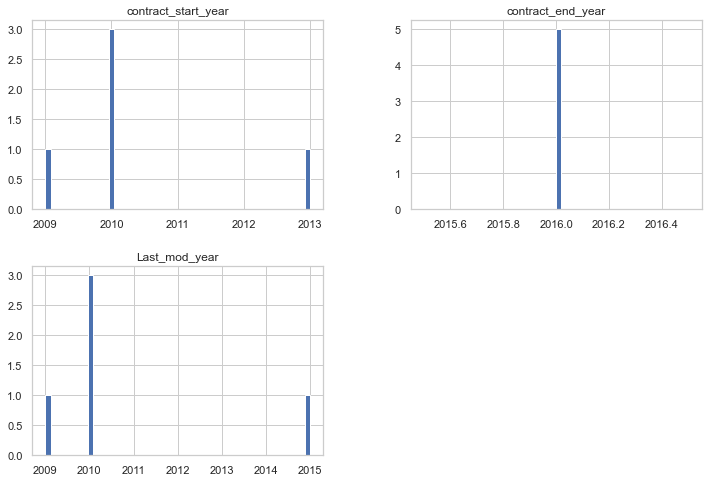

In [44]:
date_df.hist(bins=50, figsize=(12,8))
plt.show()

""""## We can also use bar plots instead
plt.figure(figsize=(6,3))
sns.countplot(y='contract_start_year', data=date_df)
plt.legend()""""

* contract_start_year : New connections have been activated mostly between 2009 to 2013 and same goes for date of last modification which indicates that not many customers have modified their contract since the start
registered date of end of contract is mostly in 2016 which will give the customers an opportunity to switch their electricity and power supplier.
* The company need to act accordingly to retain the customers before 2016
2015 indicates that majority of customers renewed their services in 2015 which means that the company has successfully retained a major portion of their customers

*   Creating a funtion that calculates the coefficient of variation

In [45]:
from scipy.stats import variation
from statistics import stdev
from statistics import mean

In [46]:
def coef_variation(data):
    num_client_data = data.select_dtypes(include=['int64','float64'])
    coef_var = []
    for column in num_client_data.columns:
        c = variation(num_client_data[column],axis=0)
        coef_var.append(c)
    coef_var = pd.DataFrame(coef_var, index=num_client_data.columns)
    coef_var = coef_var.transpose()
    return coef_var

In [47]:
# Coefficient of Variation of all the numerical columns
coef_variation(client_data)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,contract_start_year,contract_end_year,Last_mod_year
0,3.601586,5.801129,4.000057,1.277679,2.320161,5.283931,1.048768,0.179352,0.971164,0.104007,2.234208,0.823545,0.823596,0.549195,1.647363,0.32248,0.746302,3.048469,0.000822,0.000122,0.001228


In [48]:
client_data.describe()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year,Last_mod_year
count,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,3.266945,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,3.178899,18.135136,0.097152,2010.577502,2016.064563,2012.467753
std,2.183223,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,0.887801,13.534743,0.296175,1.653268,0.245761,2.471617
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.300000,0.000000,2003.000000,2016.000000,2003.000000
25%,0.000000,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,2.000000,12.500000,0.000000,2010.000000,2016.000000,2010.000000
50%,4.000000,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,3.000000,13.856000,0.000000,2011.000000,2016.000000,2013.000000
75%,4.000000,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,4.000000,19.172500,0.000000,2012.000000,2016.000000,2015.000000
max,7.000000,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,5.000000,320.000000,1.000000,2014.000000,2017.000000,2016.000000


In [49]:
# The very high max values in the consumption columns are quite evident
# The real consumption vary greatly from the forecasted consumption but they follow the trend for the quartile ranges

In [50]:
client_data.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year,Last_mod_year
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,4,43.648,1,2013,2016,2015
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,2,13.800,0,2009,2016,2009


In [51]:
# Let's view price dataset.
# load price dataset
price = pd.read_csv(r'C:\Users\HP\Desktop\T&C Development\Graduate Program\Forage Projects\My BCG\price_data.csv')
price.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [52]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [53]:
#Convert datetime feature to datetime data type
#price['price_date'] = pd.to_datetime(price['price_date'])
# convert datetime feature to datetime data type
for p in ['price_date']:
    price[p] = pd.to_datetime(price[p])

In [54]:
#Renaming some columns for easy understanding 
# Add some new features from the above datetime features
price['price_year'] = price['price_date'].dt.year
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_year
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,2015
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,2015
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,2015
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,2015
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,2015


In [55]:
duplicate_and_missing(dataset=price, dataset_name='price')

There are 193002 rows and 9 columns in the dataset "price" 
--------------------------------------------------------------------------------
There is no missing value
There is no duplicate row



In [56]:
describe_categorical(dataset=price)

Categorical variables are ['id'] 
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d     12    0.000062
1      ab07311332ad017c071947aa1747bf9e     12    0.000062
2      aab99b3be145225dbff8551b256da9e0     12    0.000062
3      aac9a198cee4c2eb9d975ca21b38f00b     12    0.000062
4      aacb5f6ab9d32c8cc9e58c505b028d24     12    0.000062
...                                 ...    ...         ...
16091  83cf18b07114e495ae8b7fb235e45ee2      8    0.000041
16092  223a98d3832ece78cbf279a194868b54      8    0.000041
16093  bf89f2d8c1b133a134fd93603cb4c947      7    0.000036
16094  c5dcd5c506e565aaabffa29bc1ec0a37      7    0.000036
16095  15b36e47cf04bf151e3f4438d12672e5      7    0.000036

[16096 rows x 3 columns] 
--------------------------------------------------------------------------------


In [57]:
describe_numeric(dataset=price)

Numeric variables are ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'] 
                    min        max       mean     median
price_off_peak_var  0.0   0.280700   0.141027   0.146033
price_peak_var      0.0   0.229788   0.054630   0.085483
price_mid_peak_var  0.0   0.114102   0.030496   0.000000
price_off_peak_fix  0.0  59.444710  43.334477  44.266930
price_peak_fix      0.0  36.490692  10.622875   0.000000
price_mid_peak_fix  0.0  17.458221   6.409984   0.000000 
--------------------------------------------------------------------------------


# Outliers in Numerical Data

In [58]:
price_cat_cols = ['id']
price_num_cols = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
print("categorical columns are:", price_cat_cols)
print("numerical columns are:", price_num_cols)

categorical columns are: ['id']
numerical columns are: ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']


In [59]:
#We only need the statistical analytics of numerical variables, hence we will sort out the continous variables
# Continous Columns Name
price_num_cols = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
price[price_num_cols].describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


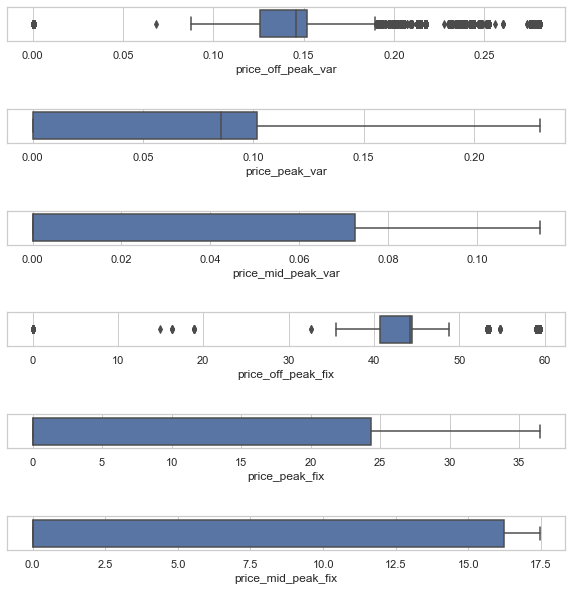

In [60]:
fig , ax = plt.subplots(ncols=1,nrows=len(price_num_cols))
fig.set_figheight(10)
fig.set_figwidth(10)
for i in range(len(price_num_cols)):
    sns.boxplot(price[price_num_cols[i]],ax=ax[i])
plt.subplots_adjust(hspace=2)
plt.show()

* There are outliers in the dataset, hence we need to get rid of them

In [61]:
df3 = price[price_num_cols]
df3.head(3)

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0.151367,0.0,0.0,44.266931,0.0,0.0
1,0.151367,0.0,0.0,44.266931,0.0,0.0
2,0.151367,0.0,0.0,44.266931,0.0,0.0


In [62]:
# There are outliers, let's try to handle them
# IQR Method
for i in df3.columns:
    q1 = df3[i].quantile(0.25)    # we are getting 25th percentile if i.th variable
    q3 = df3[i].quantile(0.75)    # we are getting 75th percentile if i.th variable
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    
    df3[i] = df3[i].replace(df3[df3[i] > ub][i].values,df3[i].quantile(0.99))  # replacing outliers with 99th percentile as no
                                                                   # outliers can be over it or we can put accordingly.
    df3[i] = df3[i].replace(df3[df3[i] < lb][i].values,df3[i].quantile(0.01))  # replacing outliers with 1st percentile as no
                                                                   # outliers can be below it or we can put accordingly.
        

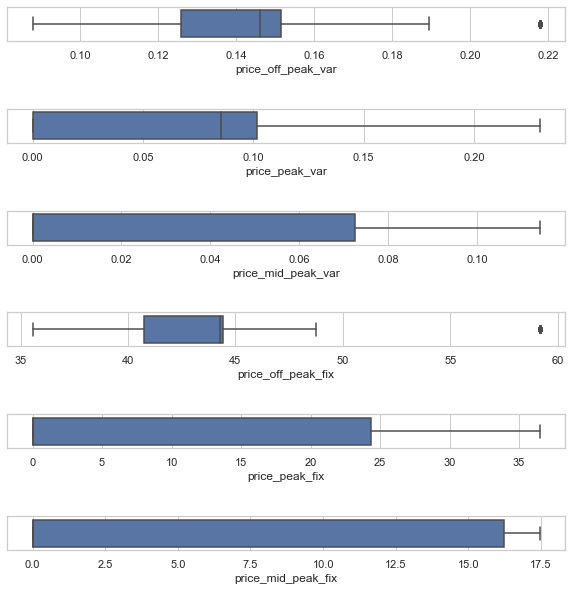

In [63]:
# Let's view again after dropping the outliers
fig , ax = plt.subplots(ncols=1,nrows=len(price_num_cols))
fig.set_figheight(10)
fig.set_figwidth(10)
for i in range(len(price_num_cols)):
    sns.boxplot(df3[price_num_cols[i]],ax=ax[i])
plt.subplots_adjust(hspace=2)
plt.show()

In [64]:
price['price_date'].describe(datetime_is_numeric=True)

count                           193002
mean     2015-06-16 12:50:49.933161216
min                2015-01-01 00:00:00
25%                2015-04-01 00:00:00
50%                2015-07-01 00:00:00
75%                2015-10-01 00:00:00
max                2015-12-01 00:00:00
Name: price_date, dtype: object

# Feature Enginering

In [65]:
# define a function to plot bar chart to display a feature's distribution with percent labels.
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = client_data[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)

# plot stacked bar chart with percent label by churn
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable, if_sort=False, figsize=(9,6)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

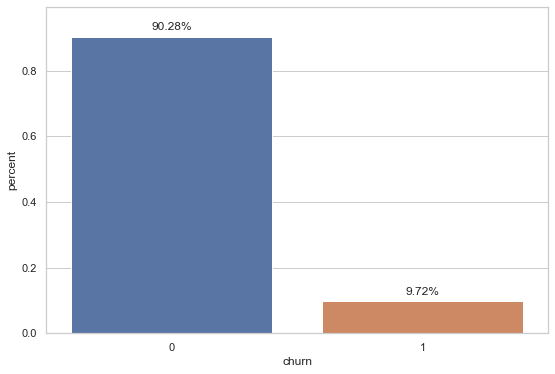

In [66]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='churn', gap_label_bar=0.02)

* 9.72% of the customers churned.

- Let's check categorical features' distribution. (Note: Discrete numeric features actually can be seen as categorial features representing the categories.)

- Type 4 is the most common sales channel. Type 1, 3 and 6 sales channels are very rare.

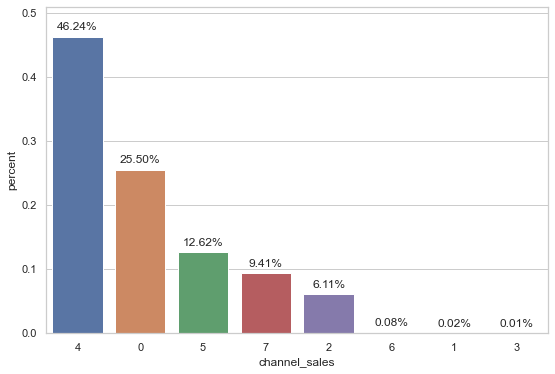

In [67]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='channel_sales', if_sort=True, gap_label_bar=0.01)

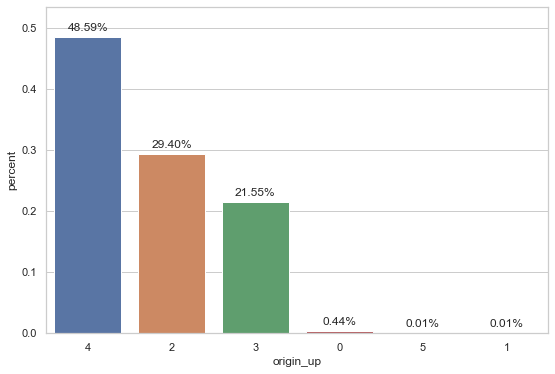

In [68]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='origin_up', if_sort=True, gap_label_bar=0.01)

- Type 4 is the most common electricty campaign that customers first subscribed to. 
- Very few customers first subscribed to Type 0, 1 and 5 electricity campaign.

- Plot stacked bar charts to show the feature distribution about the churning customers and non-churning customers.

    For the customers from different sales channels, the proportion of churning customers ranges from 5.6% to 12.1% (excluding rare channels).

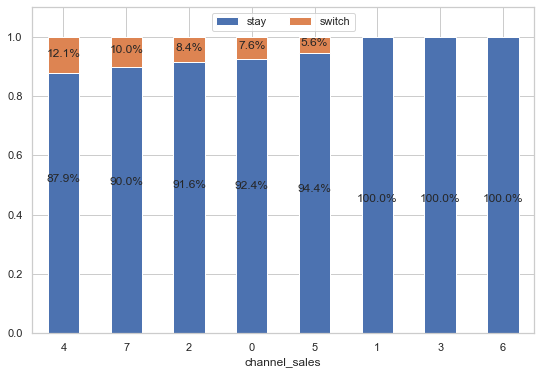

In [69]:
plot_stacked_bar_with_percent_label_by_churn(df=client_data, target_variable='channel_sales', if_sort=True)

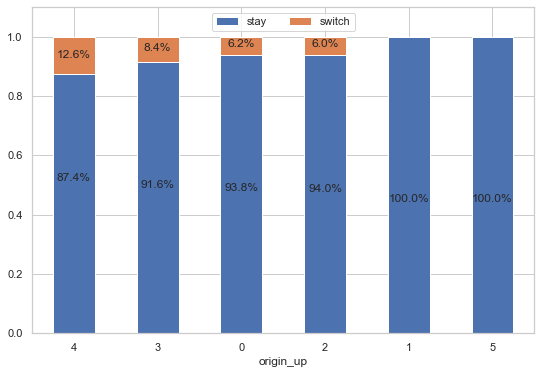

In [70]:
plot_stacked_bar_with_percent_label_by_churn(df=client_data, target_variable='origin_up', if_sort=True)

For the customers who first subscribed to different electricity campaigns, the proportion of churning customers ranges from 6.0% to 12.6% (excluding type 1 and type 5 that are 100%).

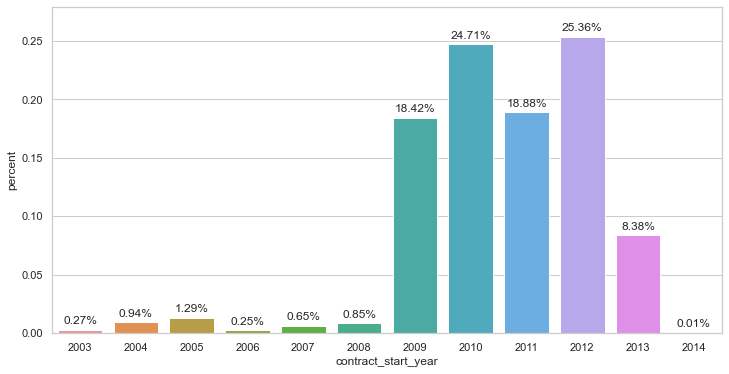

In [71]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='contract_start_year', if_sort=False, gap_label_bar=0.005, figsize=(12,6))

- Most cutomers started their contracts from 2009 to 2013.
    Among these cutomers, it seems newer customers are more likely to switch to other providers.

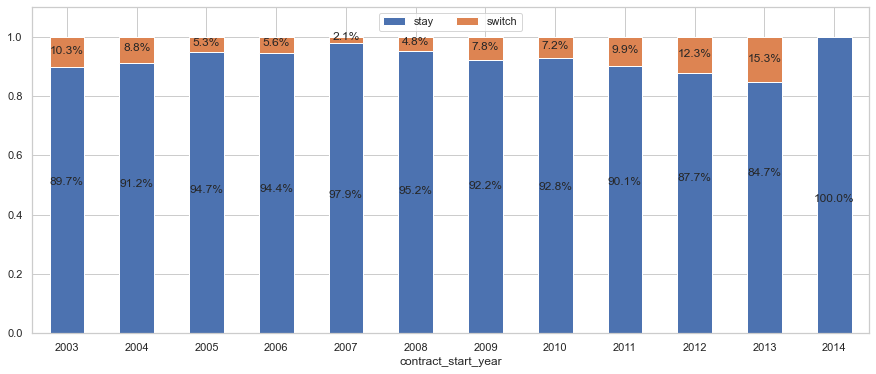

In [72]:
plot_stacked_bar_with_percent_label_by_churn(df=client_data, target_variable='contract_start_year', if_sort=False, figsize=(15,6))

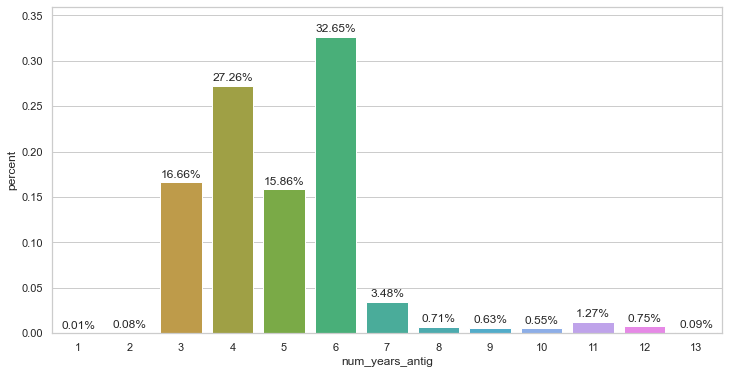

In [73]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='num_years_antig', if_sort=False, gap_label_bar=0.005, figsize=(12,6))

- Most customers stayed with the current providers for 3 to 6 years.
- Among these customers, it seems newer customers are more likely to switch to other providers.

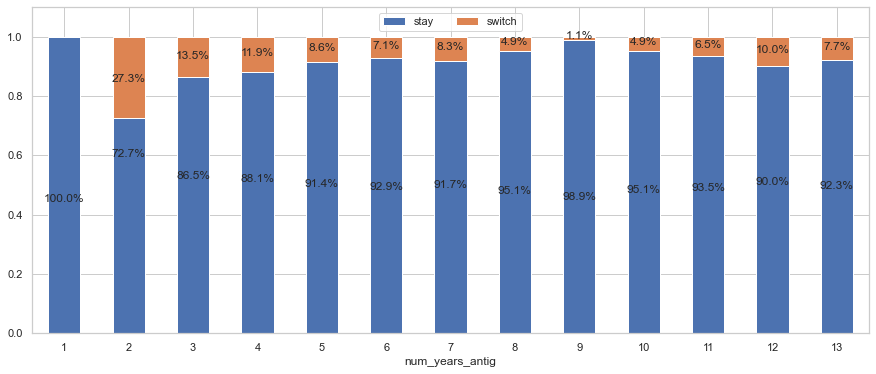

In [74]:
plot_stacked_bar_with_percent_label_by_churn(df=client_data, target_variable='num_years_antig', if_sort=False, figsize=(15,6))

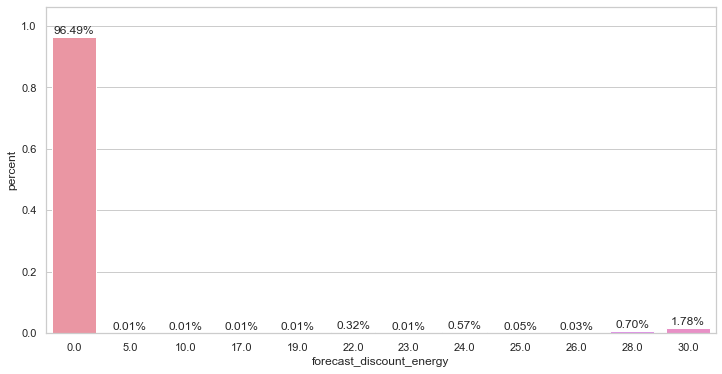

In [75]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='forecast_discount_energy', if_sort=False, gap_label_bar=0.01, figsize=(12,6))

* The vast majority of customers' forecasted value of current discount is 0.

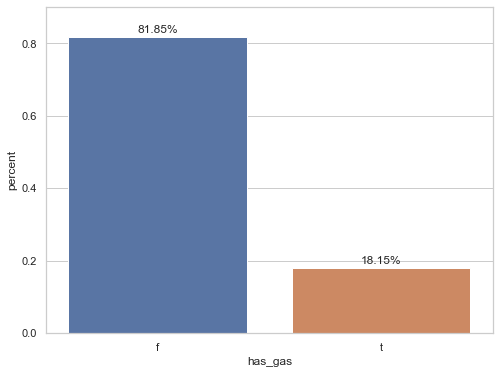

In [76]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='has_gas', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

` Only 18.15% of the clients were also gas clients.

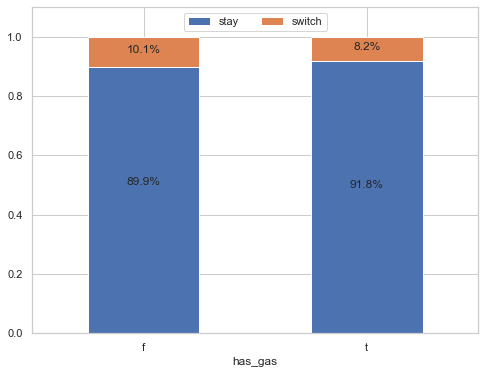

In [77]:
plot_stacked_bar_with_percent_label_by_churn(df=client_data, target_variable='has_gas', if_sort=False, figsize=(8,6))

Electricity clients are more likely to churn than electricity and gas clients.

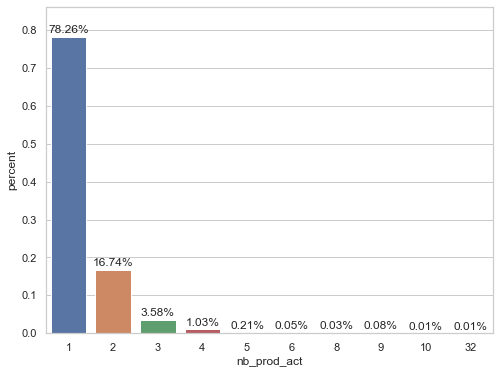

In [78]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='nb_prod_act', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

Most customers only had 1 or 2 active products and services.

# Visualization of numeric features
    using histograms to view the distribution of continous numeric features.

In [79]:
# plot histogram
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

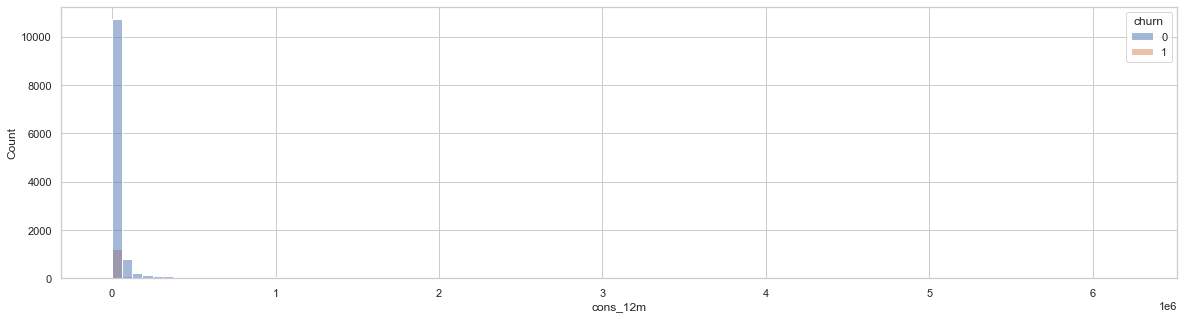

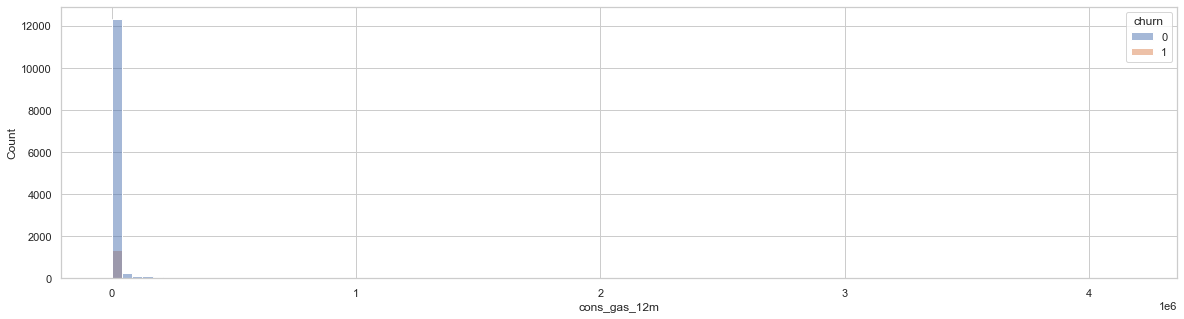

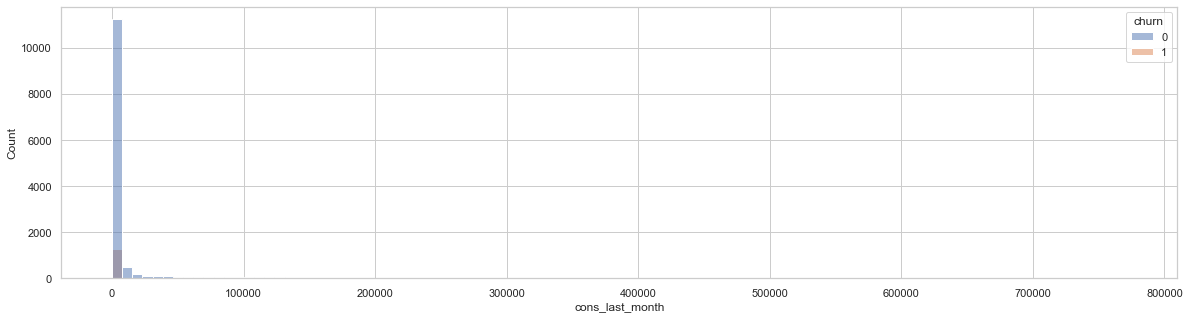

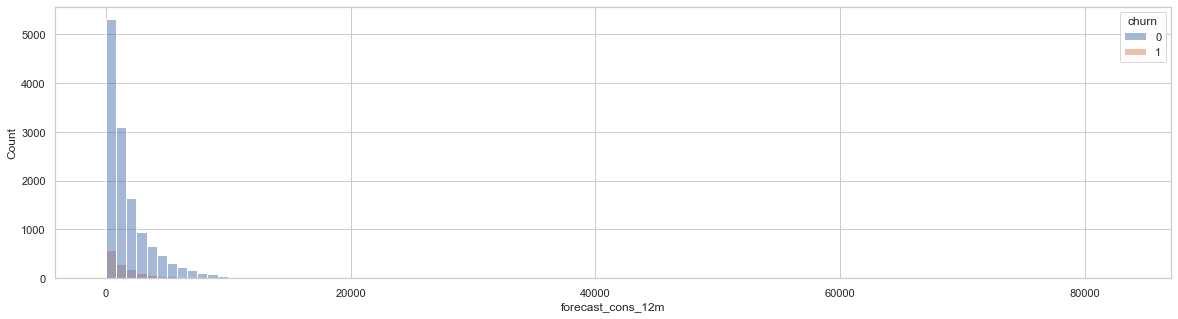

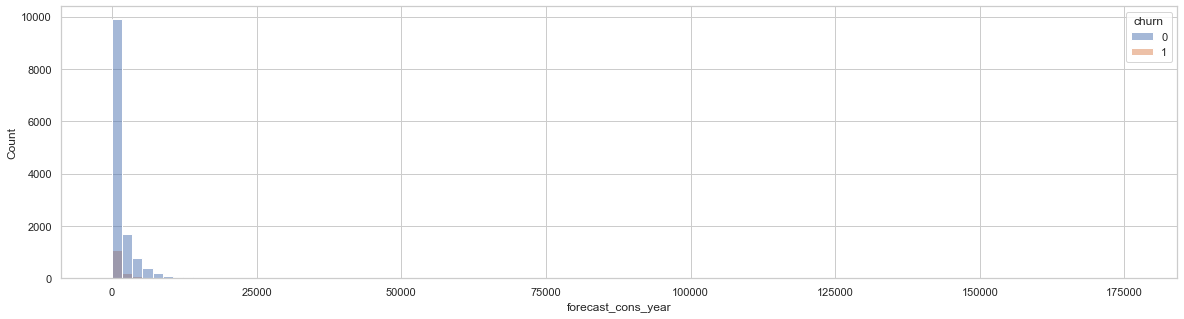

In [80]:
# histograms of energy consumption features
for attr in ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year']:
    plot_histogram_by_churn(df=client_data, target_variable=attr)

In [81]:
price['id'].value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

In [82]:
# majority of customers have 12 price reocrds and very few customers has less than 12 records.

In [83]:
price['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [ ]:
Combined with the above findings, most customers have a 12-month price records each. 
Luckily, every customer has the last-month's reocrd (2015-12-01), this will be helpful in identifying price sensitivity.

* Histograms of price features. 
    The values of each feature are centred around some points.

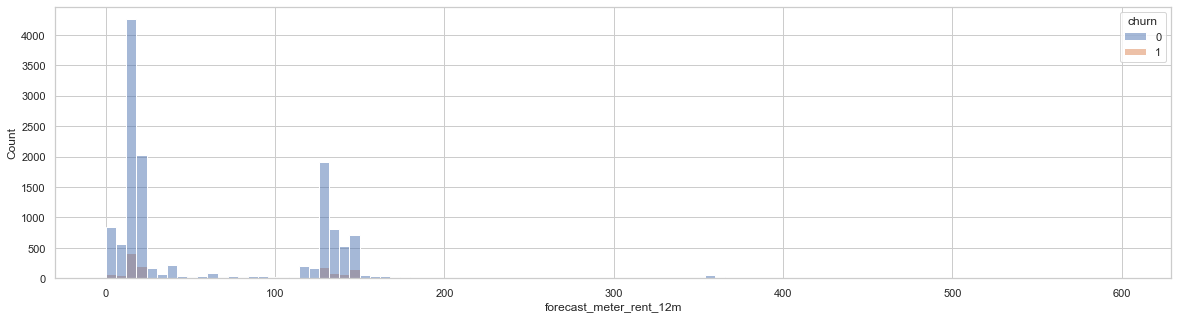

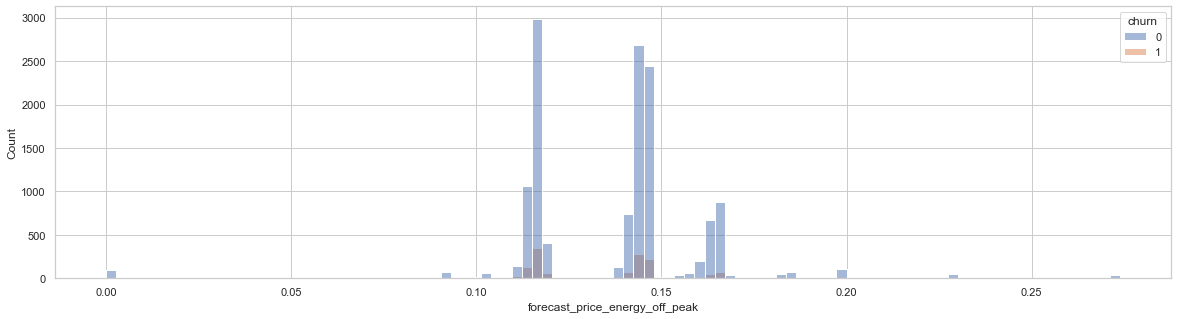

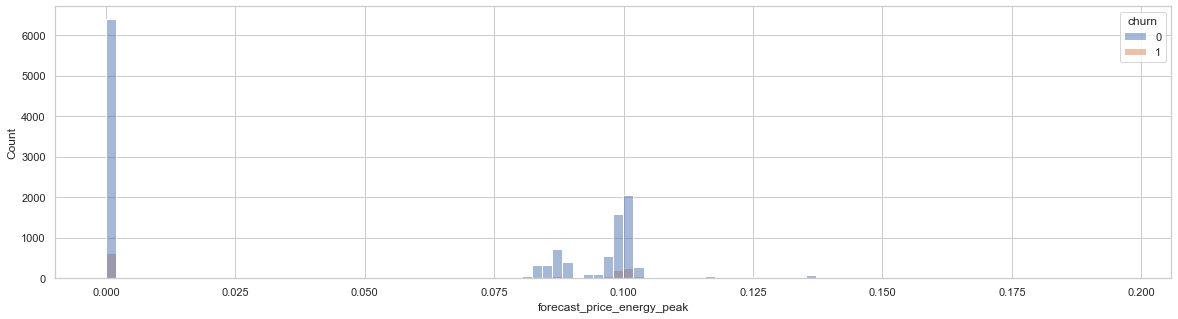

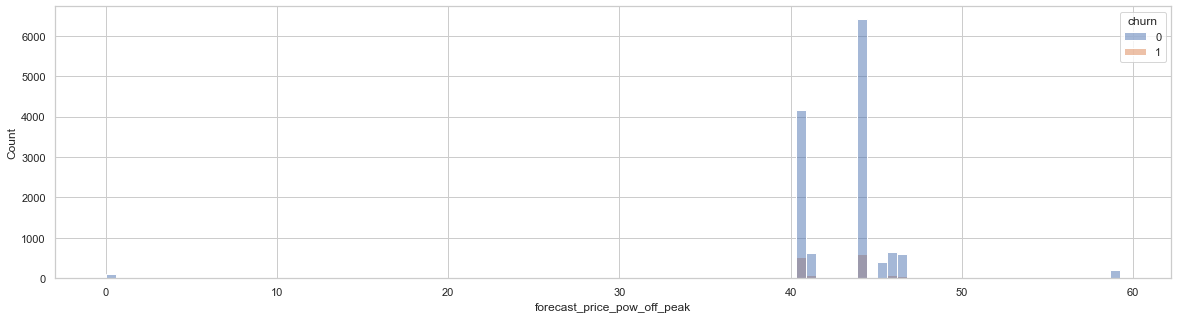

In [84]:
for attr in ['forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak',]:
    plot_histogram_by_churn(df=client_data, target_variable=attr)

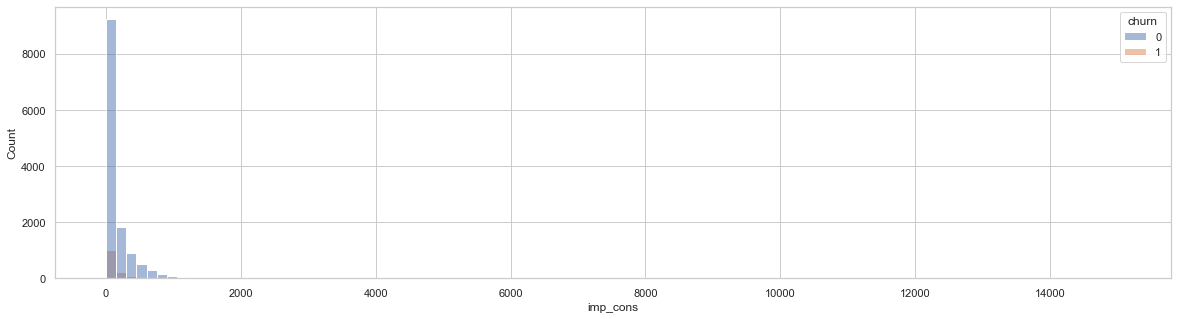

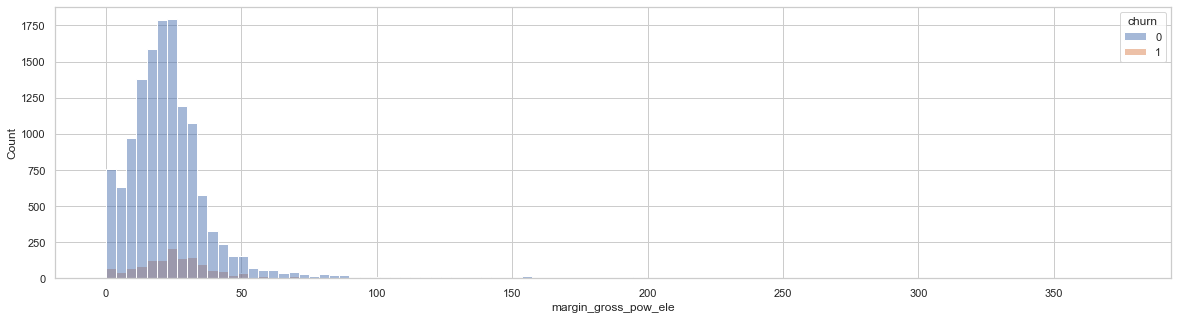

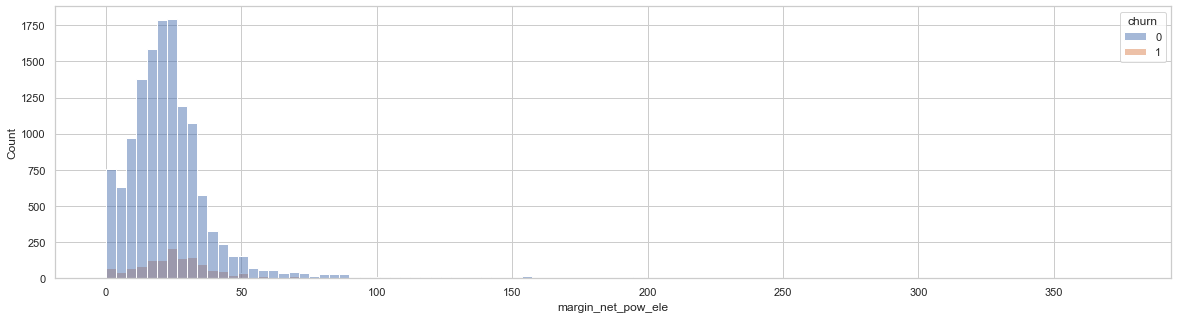

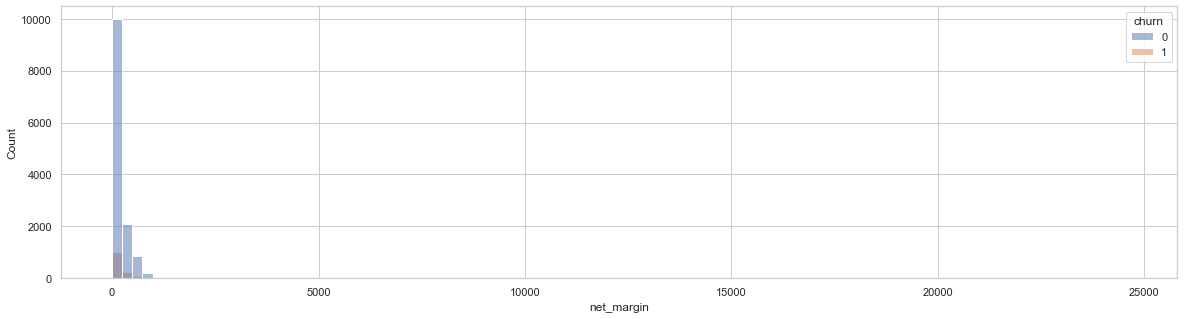

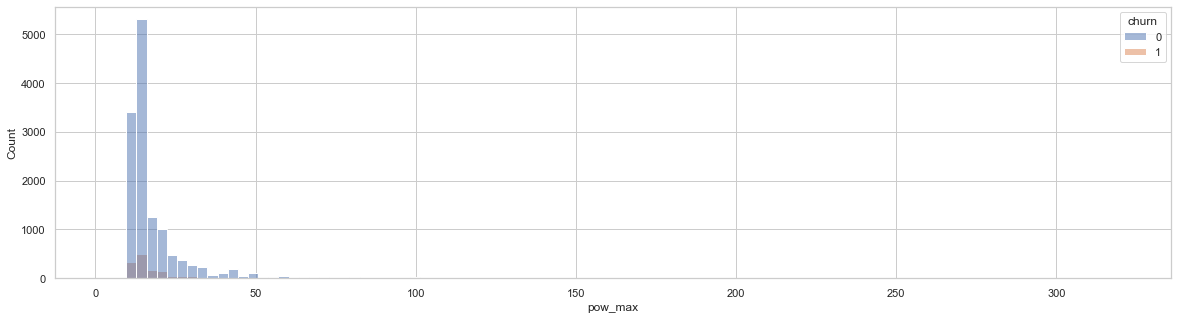

In [85]:
for attr in ['imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max',]:
    plot_histogram_by_churn(df=client_data, target_variable=attr)

In [ ]:
#There are lots of 0 peak prices and mid-peak prices, but very few 0 off peak prices.
#So, I will analyse price sensivity only based on off-peak prices.

# Sub-Task 2:

* Verify the hypothesis of price sensitivity being to some extent correlated with churn. 
* It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.



* Now, let's check customers sensitivity to price. (Note: Normally, assuming other factors do not change, when the price increases, some customers would switch, then we can say these customers are sensitive to price as the increase in prices lead the customer churn.
    But, if there is a decrease or no change in the price and customers still change their providers, I think in this case we cannot say these cutomers are sensitive to price.)

*Calculate maximum, minimum and average prices over the whole year

In [86]:
stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_,
                                                      'price_off_peak_fix': stat_, 'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})
# flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(3)
#Converting or Changing data format to a narrow format. 
#The advantage of the flattened list is Increases the computing speed and Good understanding of data.

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [87]:
#Merge client dataset to the above dataset to add churn data
# add churn values
price_stat = price_stat.merge(client_data[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat = price_stat.dropna(subset=['churn']).reset_index(drop=True)
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [88]:
# Calculate the biggest changes in prices over the whole year.
for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000


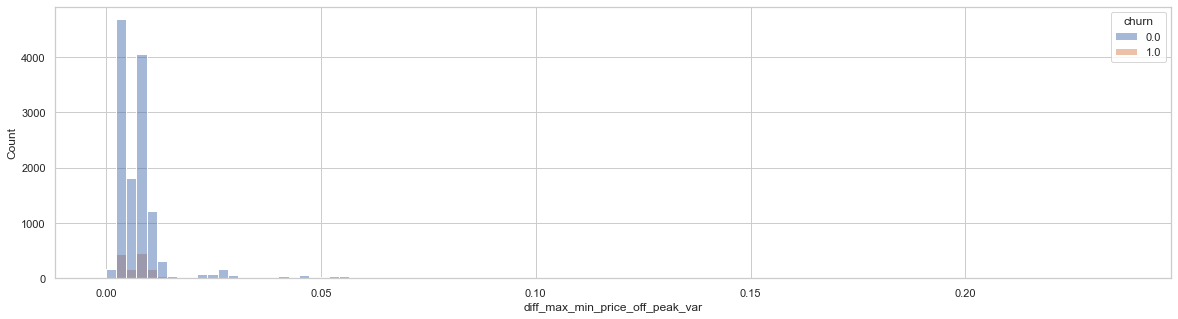

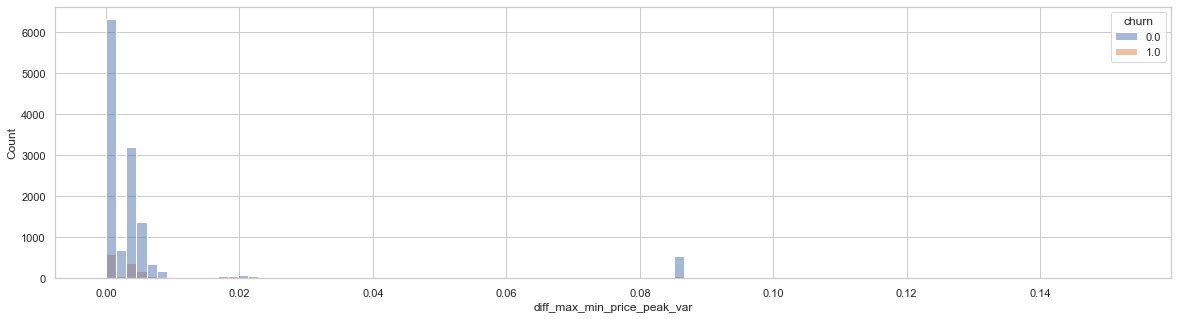

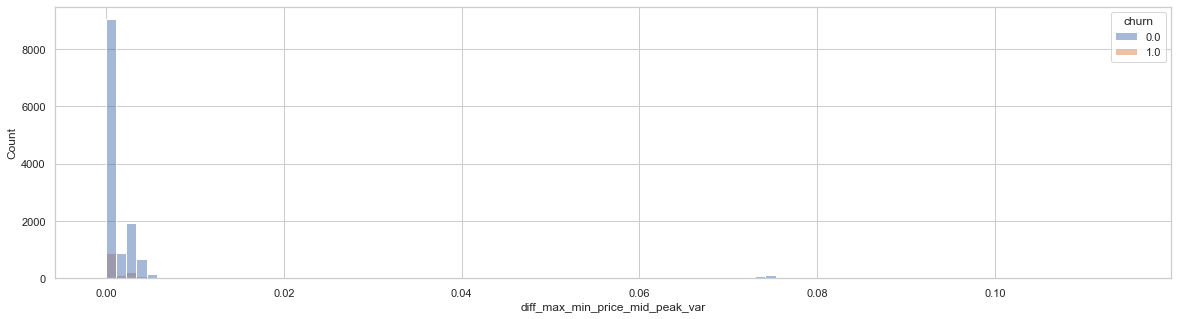

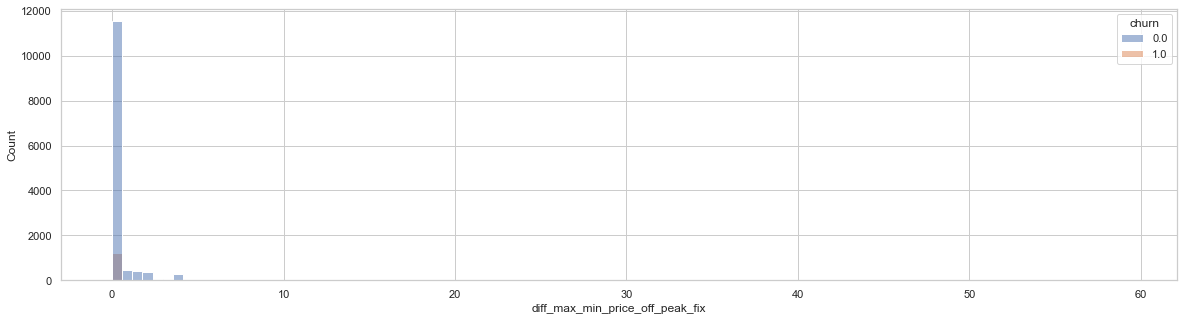

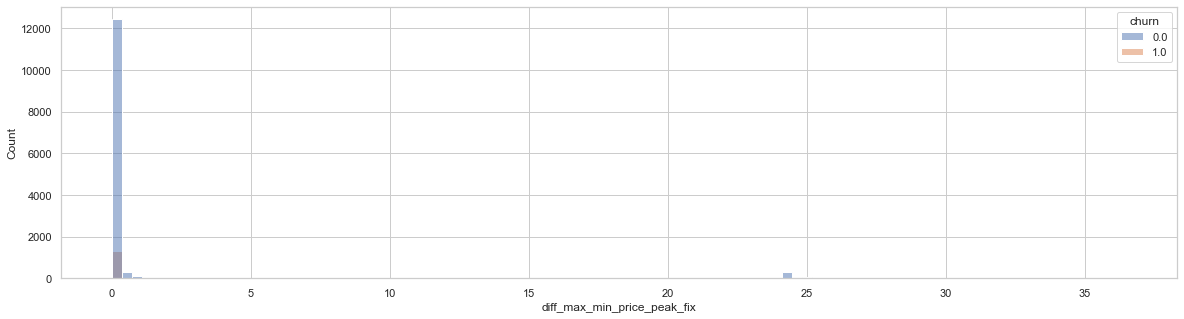

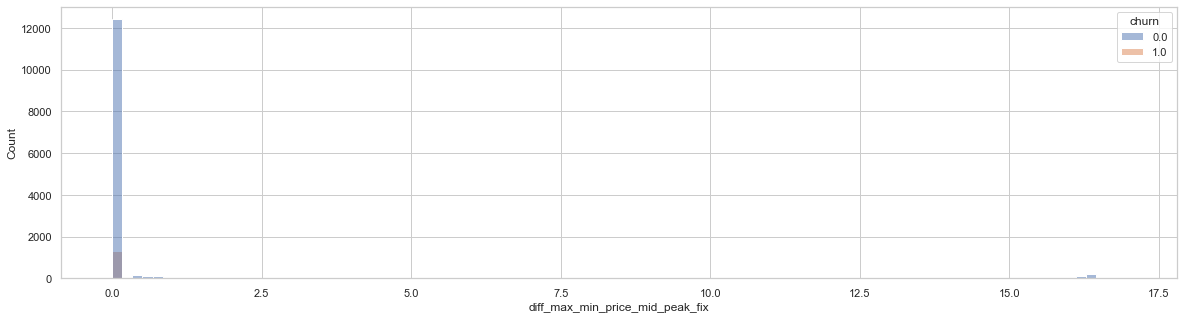

In [89]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_max_min_{attr}', if_churn=True)

In [ ]:
#Calculate the difference between the price last month (2015-12-01) and mean price.

In [90]:
# add diff
for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = price[price['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166,-0.004432,-0.002121,0.000559,0.027153,0.016292,0.010861
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000,-0.002483,0.000000,0.000000,0.059260,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000,0.019722,0.000000,0.000000,0.625000,0.000000,0.000000


In [ ]:
#Most cutomers' prices last month were very close to the mean prices over the whole year.

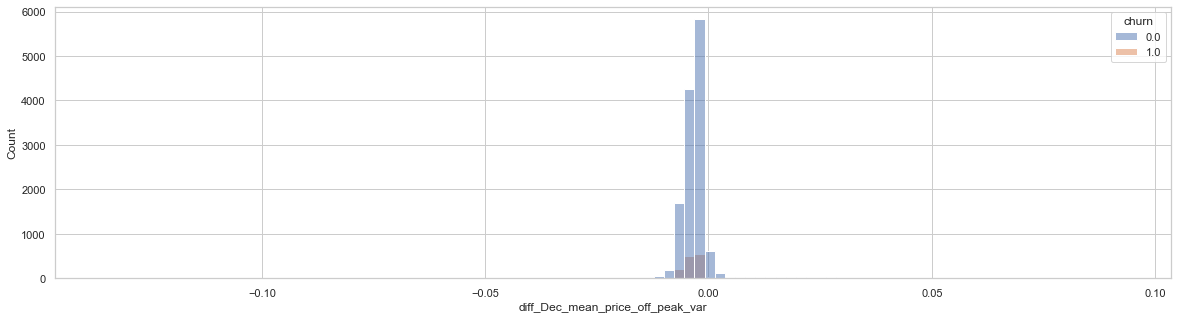

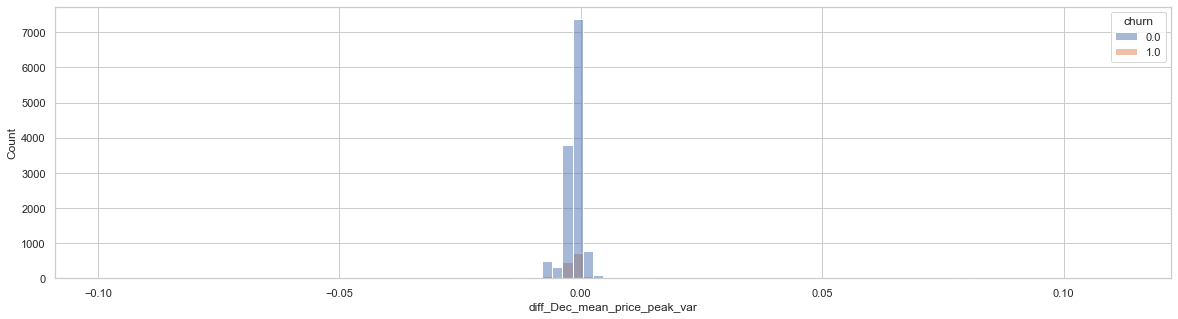

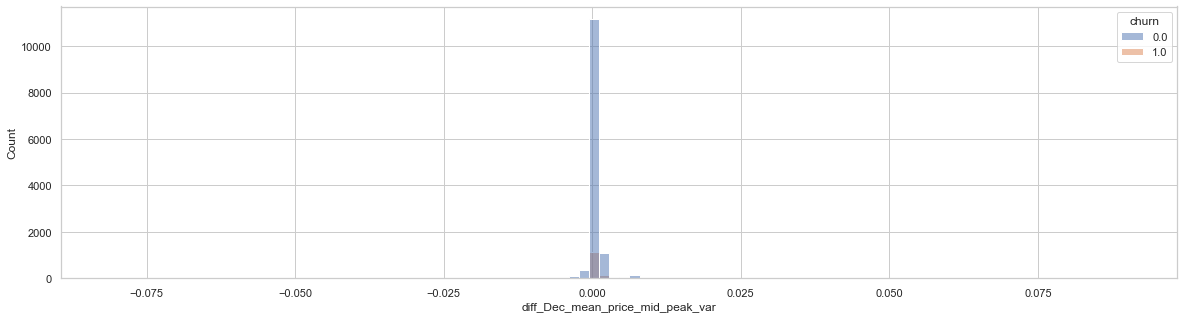

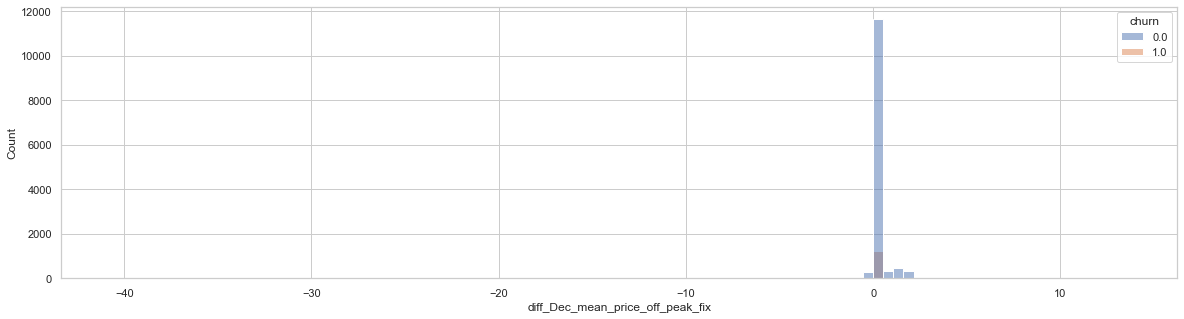

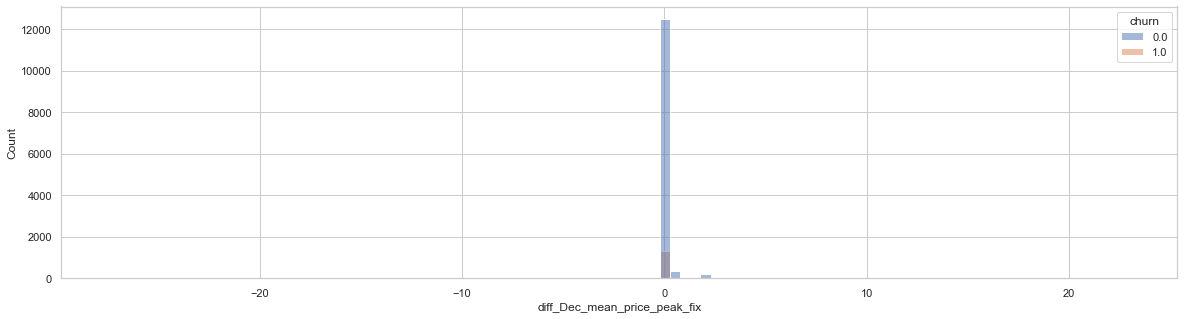

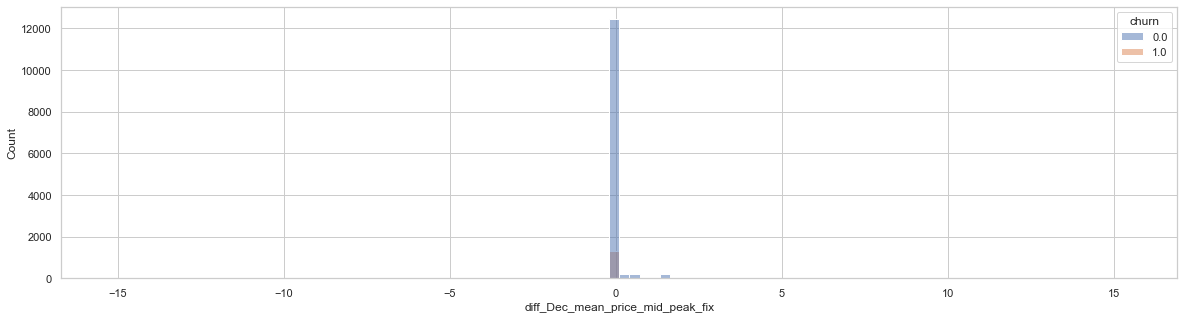

In [91]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_Dec_mean_{attr}', if_churn=True)

Check whether changes in prices would affect customer churn (only considering off peak prices)

Among the cutomers whose off-peak enery prices increased, around 9.72% of customers changed their providers.

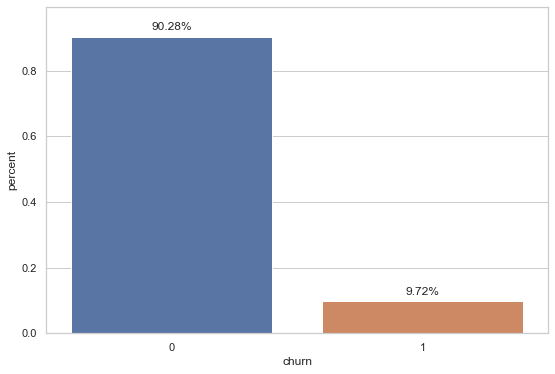

In [92]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

Among the cutomers whose off-peak energy prices did not increase (decreased or did not change), also around 9.72% of customers changed their providers.

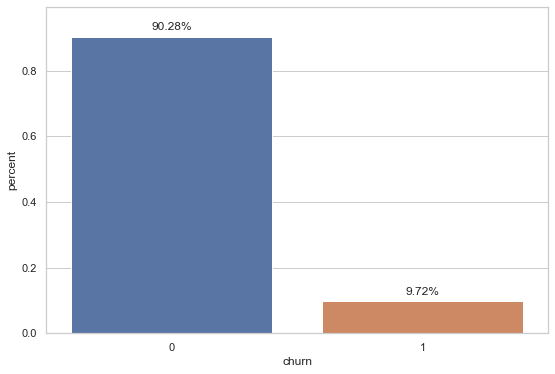

In [93]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

Among the cutomers whose off-peak power prices increased, around 9.72% of customers changed their providers.

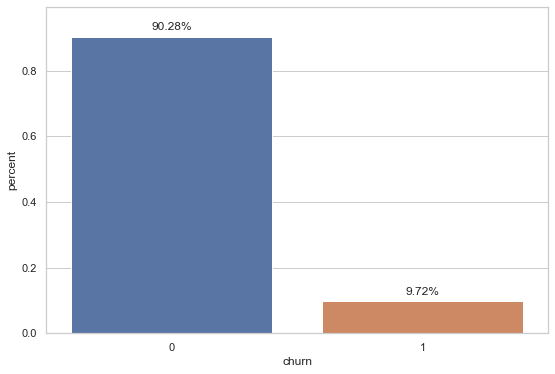

In [94]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

Among the cutomers whose off-peak enery prices did not increase (decreased or did not change), also around 9.72% of customers changed their providers.

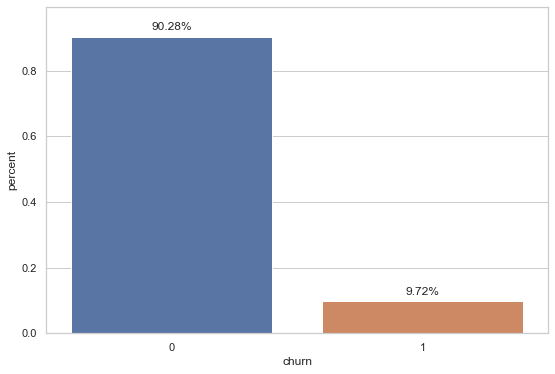

In [95]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']<=0], target_variable='churn', gap_label_bar=0.02)

From the above results, we can see no matter how prices changed, proportion of churning customers always stayed around 9.72%. In other words, changes in prices did not affect customer churn. Therefore, we can conclude customers were not sensitive to prices.

In order to confirm this conlusion, I continue to compare prices of December with average prices of the last 6 months and 3 months.

In [96]:
price_stat_6_month = price[price['price_date']>'2015-06-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_stat_6_month.columns = ['_'.join(x) for x in zip(price_stat_6_month.columns.get_level_values(0), price_stat_6_month.columns.get_level_values(1))]
price_stat_6_month = price_stat_6_month.reset_index()
# add churn values
price_stat_6_month = price_stat_6_month.merge(client_data[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat_6_month = price_stat_6_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_6_month[f'diff_Dec_mean_{attr}'] = price[price['id'].isin(price_stat_6_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_6_month[f'{attr}_mean']
price_stat_6_month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.121266,40.728885,40.728885,40.728885,0.0,-0.001360,0.000000e+00
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.144687,44.444710,44.444710,44.444710,0.0,-0.000744,-7.105427e-15
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.201280,0.202024,45.944710,45.944710,45.944710,0.0,-0.000744,-7.105427e-15
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.146184,44.266930,44.266930,44.266930,0.0,-0.000744,0.000000e+00
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.123007,40.728885,40.728885,40.728885,0.0,-0.001360,0.000000e+00


If only considering the last 6 months, changes in prices still did not affect customer churn.

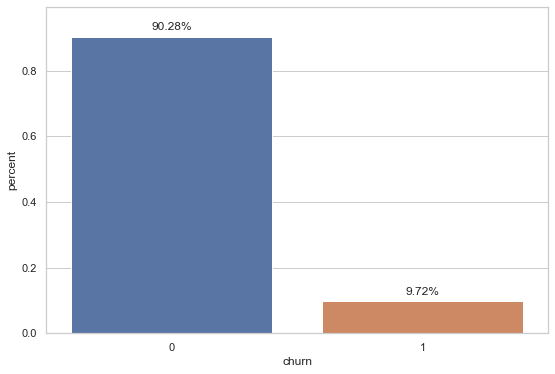

In [97]:
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

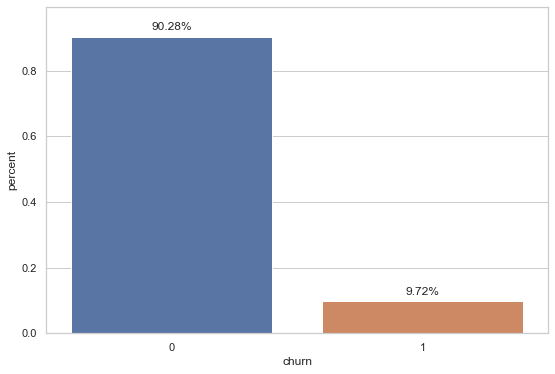

In [98]:
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

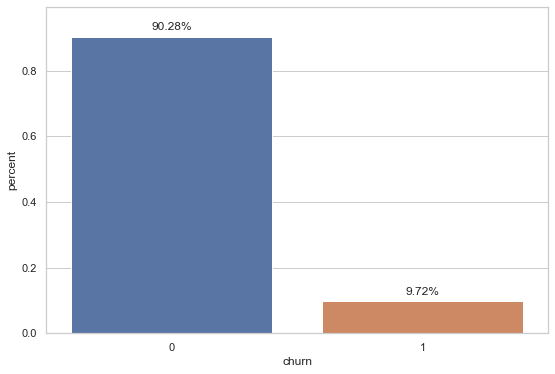

In [99]:
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

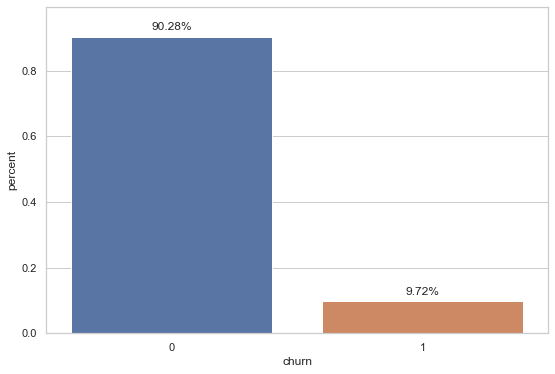

In [100]:
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

In [101]:
price_stat_3_month = price[price['price_date']>'2015-09-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_stat_3_month.columns = ['_'.join(x) for x in zip(price_stat_3_month.columns.get_level_values(0), price_stat_3_month.columns.get_level_values(1))]
price_stat_3_month = price_stat_3_month.reset_index()
# add churn values
price_stat_3_month = price_stat_3_month.merge(client_data[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat_3_month = price_stat_3_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_3_month[f'diff_Dec_mean_{attr}'] = price[price['id'].isin(price_stat_3_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_3_month[f'{attr}_mean']
price_stat_3_month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.119906,0.119906,40.728885,40.728885,40.728885,0.0,0.0,0.000000e+00
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.143943,0.143943,44.444710,44.444710,44.444710,0.0,0.0,7.105427e-15
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.201280,0.201280,45.944710,45.944710,45.944710,0.0,0.0,7.105427e-15
3,00114d74e963e47177db89bc70108537,0.145440,0.145440,0.145440,44.266930,44.266930,44.266930,0.0,0.0,0.000000e+00
4,0013f326a839a2f6ad87a1859952d227,0.121647,0.121647,0.121647,40.728885,40.728885,40.728885,0.0,0.0,0.000000e+00


If only considering the last 3 months, changes in prices did not affect customer churn either.

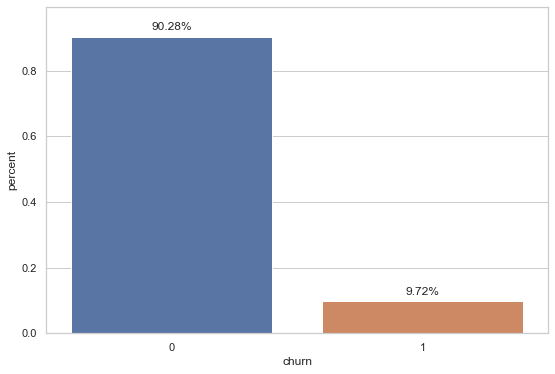

In [102]:
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

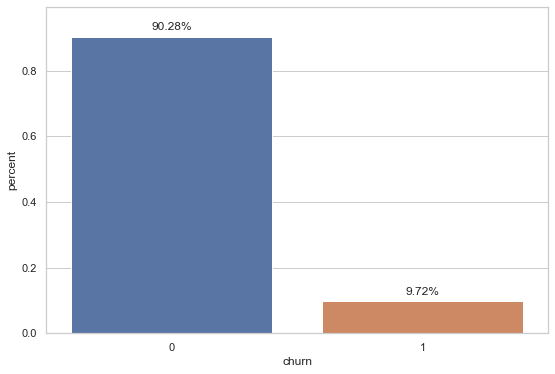

In [103]:
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

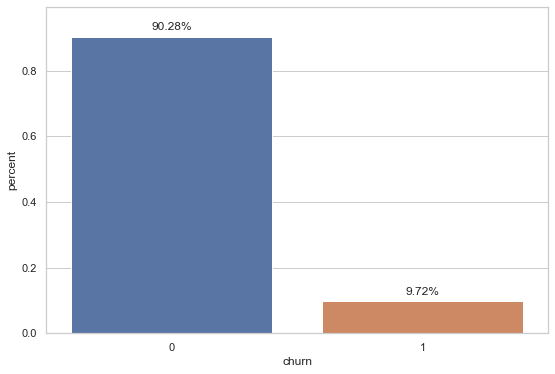

In [104]:
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

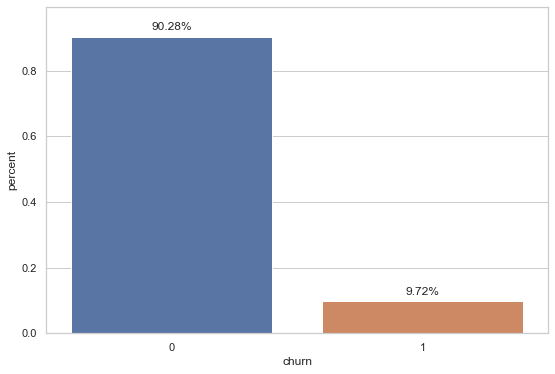

In [105]:
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

From all results above, we can conclude customers were not sensitive to prices.

Sub_Task 3
Key findings

1. About 9.72% of customers changed providers.

2. Numeric variables on consumption are highly skewed.

3. Changes in prices does not affect customer churn.

Suggestions

1. Competitor price data – If other providers can gave a much better offer than the current provider, customers were more likely to transfer to new provider even if their current prices dropped.

2. Need to clarify what values of zero in price data represent. If the prices of zero stand for free power or energy, what is the reason for that.

3. Other possible factors, such as customer satisfaction. For example, if providers could keep providing excellent customer services, it is very likely a rise in prices will not lead to customer churn.

## Task 3: Feature Engineering & Modelling
<font size="3"> **Background information**
    
<font size="3">The team now has a good understanding of the data and feels confident to use the data to further understand the business problem. The team now needs to brainstorm and build out features to uncover signals in the data that could inform the churn model.

<font size="3">Feature engineering is one of the keys to unlocking predictive insight through mathematical modeling. Based on the data that is available and was cleaned, identify what you think could be drivers of churn for our client and build those features to later use in your model.

<font size="3">First focus on building on top of the feature that your colleague has already investigated: “the difference between off-peak prices in December and January the preceding year”. After this, if you have time, feel free to get creative with making any other features that you feel are worthwhile.

<font size="3">Once you have a set of features, you must train a Random Forest classifier to predict customer churn and evaluate the performance of the model with suitable evaluation metrics. Be rigorous with your approach and give full justification for any decisions made by yourself as the intern data scientist. 

<font size="3">Recall that the hypotheses under consideration is that churn is driven by the customers’ price sensitivities and that it would be possible to predict customers likely to churn using a predictive model.

<font size="3">If you’re eager to go the extra mile for the client, when you have a trained predictive model, remember to investigate the client’s proposed discounting strategy, with the head of the SME division suggesting that offering customers at high propensity to churn a 20% discount might be effective.

<font size="3">Build your models and test them while keeping in mind you would need data to prove/disprove the hypotheses, as well as to test the effect of a 20% discount on customers at high propensity to churn.
    
<font size="3"> **Task**
    
<font size="3">Sub-Task 1

<font size="3">Your colleague has done some work on engineering the features within the cleaned dataset and has calculated a feature which seems to have predictive power. 

<font size="3">This feature is “the difference between off-peak prices in December and January the preceding year”. 

<font size="3">Run the cells in the notebook provided (named feature_engineering.ipynb) to re-create this feature. then try to think of ways to improve the feature’s predictive power and elaborate why you made those choices. 

<font size="3">Sub-Task 2

<font size="3">Now that you have a dataset of cleaned and engineered features, it is time to build a predictive model to see how well these features are able to predict a customer churning. It is your task to train a Random Forest classifier and to evaluate the results in an appropriate manner. We would also like you to document the advantages and disadvantages of using a Random Forest for this use case. 

In [106]:
# load packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

Sub-Task 1
- Prepare date

In [107]:
# drop useless columns
train_data = client_data.copy()
train_data['year_modif_prod'] = train_data['date_modif_prod'].dt.year
train_data['year_renewal'] = train_data['date_renewal'].dt.year
train_data = train_data.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])
# 
has_gas_encoder = LabelEncoder()
train_data['has_gas'] = has_gas_encoder.fit_transform(train_data['has_gas'])
# add new feature "diff_dec_jan_off_peak_var" and "diff_dec_jan_off_peak_fix". I just calculate the differnece between last price and first price for each customer.
diff_dec_jan_off_peak_var = price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(-1) - price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(0)
diff_dec_jan_off_peak_var = diff_dec_jan_off_peak_var.reset_index(name='diff_dec_jan_off_peak_var')
diff_dec_jan_off_peak_fix = price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(-1) - price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(0)
diff_dec_jan_off_peak_fix = diff_dec_jan_off_peak_fix.reset_index(name='diff_dec_jan_off_peak_fix')
train_data = train_data.merge(diff_dec_jan_off_peak_var, on='id', how='left')
train_data = train_data.merge(diff_dec_jan_off_peak_fix, on='id', how='left')
# also add the above differences of other prices
for attr in ['price_peak_var','price_peak_fix','price_mid_peak_var','price_mid_peak_fix']:
    diff_dec_jan_temp = price.sort_values(by=['price_date']).groupby(['id'])[attr].nth(-1) - price.sort_values(by=['price_date']).groupby(['id'])[attr].nth(0)
    diff_dec_jan_temp = diff_dec_jan_temp.reset_index(name=f'diff_dec_jan_{attr}')
    train_data = train_data.merge(diff_dec_jan_temp, on='id', how='left')
# add price changing trends
train_data = train_data.merge(price_stat[['id','diff_Dec_mean_price_off_peak_var','diff_Dec_mean_price_off_peak_fix',
                                          'diff_Dec_mean_price_peak_var','diff_Dec_mean_price_peak_fix',
                                          'diff_Dec_mean_price_mid_peak_var','diff_Dec_mean_price_mid_peak_fix',
                                        ]], on='id', how='left')

#
train_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year,Last_mod_year,year_modif_prod,year_renewal,diff_dec_jan_off_peak_var,diff_dec_jan_off_peak_fix,diff_dec_jan_price_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,4,43.648,1,2013,2016,2015,2015,2015,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,0.021246,3.324664,-0.015266,-22.352010,-0.066530,-14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,2,13.800,0,2009,2016,2009,2009,2015,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,-0.002009,0.133335,-0.007124,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,2,13.856,0,2010,2016,2010,2010,2015,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,-0.002714,0.059260,-0.000012,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,2,13.200,0,2010,2016,2010,2010,2015,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,-0.002624,0.044445,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,2,19.800,0,2010,2016,2010,2010,2015,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,-0.004268,0.040729,-0.001965,0.024437,0.000854,0.016292


In [ ]:
'''Create training data and training label.

Note: for tree-based models

there is no need to perform data scaling, unlike other machine learning models.
do not apply one-hot encoding to processing categorical variables, just use label-encoding to convert categorical variables to numeric variables.'''

In [108]:
X = train_data.drop(columns=['id','churn'])
y = train_data['churn']
X.shape, y.shape

((14606, 37), (14606,))

In [ ]:
Sub-Task 2
According to the task requirement, build a RandomForest model.

As there is no testing set, the "out-of-fold" cross validation strategy is used to evaluate the model's performace.
Besides, the training set is a very imbalanced dataset, so I use precision and recall as the metrics, instead of accuracy (results of accuracy are still shown, but not for evaluating the model's performance).
As the goal of this task is not finding the optimal parameters, I do not tune the model's parameters.

In [109]:
# 
pred_train_labels = np.zeros(shape=(X.shape[0], 2))   # pred training labels
feature_importance_df = pd.DataFrame(data={'feature_name':X.columns, 'feature_importance':[0]*len(X.columns)})
# create cv dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
fold_counter = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # build model
    rf = RandomForestClassifier(random_state=88)
    # train model
    rf.fit(X_train, y_train)
    pred_train_labels[test_index] = rf.predict_proba(X_test)
    feature_importance_df['feature_importance'] = feature_importance_df['feature_importance'] + (rf.feature_importances_)
    print(f"Fold {fold_counter} Precision {precision_score(y_test, rf.predict(X_test)):.3f} Recall {recall_score(y_test, rf.predict(X_test)):.3f} Accuracy {accuracy_score(y_test, rf.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1
# predicted labels
pred_y = pred_train_labels.argmax(axis=-1)
print(f"Total  Precision {precision_score(y, pred_y):.3f} Recall {recall_score(y, pred_y):.3f} Accuracy {accuracy_score(y, pred_y):.3f}")

Fold 1 Precision 0.652 Recall 0.053 Accuracy 0.905
Fold 2 Precision 0.818 Recall 0.063 Accuracy 0.908
Fold 3 Precision 0.857 Recall 0.063 Accuracy 0.908
Fold 4 Precision 0.778 Recall 0.049 Accuracy 0.906
Fold 5 Precision 0.842 Recall 0.057 Accuracy 0.908
Total  Precision 0.786 Recall 0.057 Accuracy 0.907


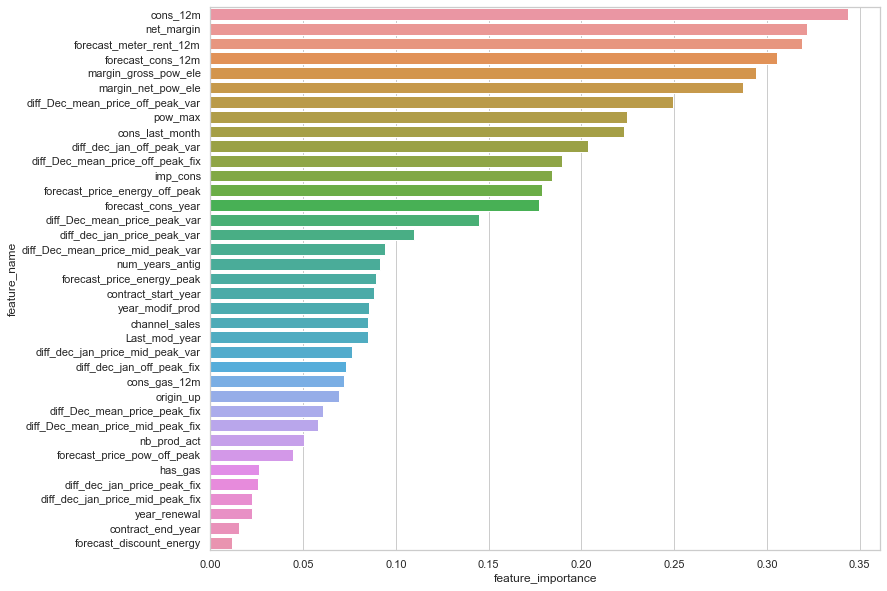

In [110]:
#The below figure displays how important each feature is when growing trees.
fig = plt.figure(figsize=(12,10))
ax = sns.barplot(data=feature_importance_df.sort_values(by=['feature_importance'], ascending=False), y='feature_name', x='feature_importance')

In [111]:
#The below table shows the main classification metrics.
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13187
           1       0.79      0.06      0.11      1419

    accuracy                           0.91     14606
   macro avg       0.85      0.53      0.53     14606
weighted avg       0.90      0.91      0.87     14606



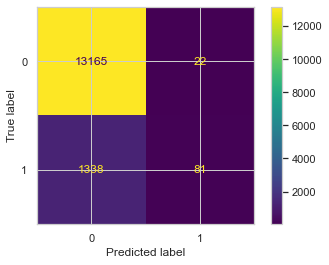

In [112]:
#The below figure shows the confusion matrix.
cm = confusion_matrix(y, pred_y, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

Based on the results above, we can see the performance is very bad. 
Although the accuracy is about 91%, it is misleading and pointless, as we only focus on correctly predicting the positive class rather than the nagetive class. 
The model can only find out 5% of real positive samples. 
But luckily, in the predicted positive samples, up to 82% of them are real positive samples.

### Bonus task: identify the impact of a 20% discount
<font size="3"> This is a tricky problem.
- <font size="3"> first, intuitively, we have concluded that changes in prices do not have a significant impact on customer churn. So, a discount should be unable to prevent customer churn.
- <font size="3"> second, we cannot really identify whether a discount can prevent customer churn, as we do not exactly know what will happen in the future.

<font size="3"> Therefore, I try to calculate the expected profit based on the probability of customer churn and evaluate the impact of the discount. 

In [113]:
prob_no_discount = pd.DataFrame(data = pred_train_labels, columns=['0', '1'])
prob_no_discount['id'] = train_data['id']
prob_no_discount = prob_no_discount[['id','0','1']]
prob_no_discount

,id,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,0.64,0.36
1,d29c2c54acc38ff3c0614d0a653813dd,0.99,0.01
2,764c75f661154dac3a6c254cd082ea7d,0.87,0.13
3,bba03439a292a1e166f80264c16191cb,0.86,0.14
4,149d57cf92fc41cf94415803a877cb4b,0.98,0.02
...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0.85,0.15
14602,d0a6f71671571ed83b2645d23af6de00,0.39,0.61
14603,10e6828ddd62cbcf687cb74928c4c2d2,0.90,0.10
14604,1cf20fd6206d7678d5bcafd28c53b4db,0.96,0.04


We need to predcit the probability of churn when applying a 20% discount. Note: I still use the data on this year, not the next year.

In [114]:
# drop useless columns
test_data = client_data.copy()
test_data['year_modif_prod'] = test_data['date_modif_prod'].dt.year
test_data['year_renewal'] = test_data['date_renewal'].dt.year
test_data = test_data.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])
# 
has_gas_encoder = LabelEncoder()
test_data['has_gas'] = has_gas_encoder.fit_transform(test_data['has_gas'])
# apply a 20% discount
diff_dec_jan_off_peak_var = price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(-1)*0.8 - price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(0)*0.8
diff_dec_jan_off_peak_var = diff_dec_jan_off_peak_var.reset_index(name='diff_dec_jan_off_peak_var')
diff_dec_jan_off_peak_fix = price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(-1)*0.8 - price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(0)*0.8
diff_dec_jan_off_peak_fix = diff_dec_jan_off_peak_fix.reset_index(name='diff_dec_jan_off_peak_fix')
test_data = test_data.merge(diff_dec_jan_off_peak_var, on='id', how='left')
test_data = test_data.merge(diff_dec_jan_off_peak_fix, on='id', how='left')
# also add the above differences of other prices
for attr in ['price_peak_var','price_peak_fix','price_mid_peak_var','price_mid_peak_fix']:
    diff_dec_jan_temp = price.sort_values(by=['price_date']).groupby(['id'])[attr].nth(-1)*0.8 - price.sort_values(by=['price_date']).groupby(['id'])[attr].nth(0)*0.8
    diff_dec_jan_temp = diff_dec_jan_temp.reset_index(name=f'diff_dec_jan_{attr}')
    test_data = test_data.merge(diff_dec_jan_temp, on='id', how='left')
# add price changing trends
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat_test = price.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': ['mean'], 'price_peak_var': ['mean'], 'price_mid_peak_var': ['mean'],
                                                      'price_off_peak_fix': ['mean'], 'price_peak_fix': ['mean'], 'price_mid_peak_fix': ['mean'],})
# flatten the column names
price_stat_test.columns = ['_'.join(x) for x in zip(price_stat_test.columns.get_level_values(0), price_stat_test.columns.get_level_values(1))]
price_stat_test = price_stat_test.reset_index()
# add diff
for attr in price_attr:
    price_stat_test[f'diff_Dec_mean_{attr}'] = price[price['id'].isin(price_stat_test['id'])].groupby(['id'])[attr].nth(-1).values*0.8 - price_stat_test[f'{attr}_mean']*0.8
#
test_data = test_data.merge(price_stat_test[['id','diff_Dec_mean_price_off_peak_var','diff_Dec_mean_price_off_peak_fix',
                                          'diff_Dec_mean_price_peak_var','diff_Dec_mean_price_peak_fix',
                                          'diff_Dec_mean_price_mid_peak_var','diff_Dec_mean_price_mid_peak_fix',
                                        ]], on='id', how='left')

#
test_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year,Last_mod_year,year_modif_prod,year_renewal,diff_dec_jan_off_peak_var,diff_dec_jan_off_peak_fix,diff_dec_jan_price_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,4,43.648,1,2013,2016,2015,2015,2015,0.016046,2.960768,-0.014330,-19.471665,-0.057229,-12.981111,0.016997,2.659732,-0.012213,-17.881608,-0.053224,-11.921072
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,2,13.800,0,2009,2016,2009,2009,2015,-0.003014,0.142223,0.000000,0.000000,0.000000,0.000000,-0.001607,0.106668,-0.005699,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,2,13.856,0,2010,2016,2010,2010,2015,-0.003736,0.142223,0.000422,0.000000,0.000000,0.000000,-0.002171,0.047408,-0.000010,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,2,13.200,0,2010,2016,2010,2010,2015,-0.003638,0.142223,0.000000,0.000000,0.000000,0.000000,-0.002099,0.035556,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,2,19.800,0,2010,2016,2010,2010,2015,-0.004954,0.130332,-0.001842,0.078199,0.002790,0.052133,-0.003415,0.032583,-0.001572,0.019550,0.000683,0.013033


In [115]:
#
testing_set = test_data.drop(columns=['id','churn'])
testing_set.shape

(14606, 37)

In [116]:
# 
pred_train_labels = np.zeros(shape=(X.shape[0], 2))   # pred training labels
pred_test_labels = np.zeros(shape=(testing_set.shape[0], 2))
# create cv dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
fold_counter = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # build model
    rf = RandomForestClassifier(random_state=56)
    # train model
    rf.fit(X_train, y_train)
    pred_train_labels[test_index] = rf.predict_proba(X_test)
    pred_test_labels += rf.predict_proba(testing_set)/5
    print(f"Fold {fold_counter} Precision {precision_score(y_test, rf.predict(X_test)):.3f} Recall {recall_score(y_test, rf.predict(X_test)):.3f} Accuracy {accuracy_score(y_test, rf.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1
# 
print(f"Total  Precision {precision_score(y, pred_y):.3f} Recall {recall_score(y, pred_y):.3f} Accuracy {accuracy_score(y, pred_y):.3f}")

Fold 1 Precision 0.867 Recall 0.046 Accuracy 0.907
Fold 2 Precision 0.826 Recall 0.067 Accuracy 0.908
Fold 3 Precision 0.900 Recall 0.063 Accuracy 0.908
Fold 4 Precision 0.737 Recall 0.049 Accuracy 0.906
Fold 5 Precision 0.778 Recall 0.049 Accuracy 0.907
Total  Precision 0.786 Recall 0.057 Accuracy 0.907


In [117]:
#Now, combine all results into a single dataset.
prob_discount = pd.DataFrame(data=pred_test_labels, columns=['0_dis','1_dis'])
customer_prob = prob_no_discount.join(prob_discount)
customer_prob.head()

,id,0,1,0_dis,1_dis
0,24011ae4ebbe3035111d65fa7c15bc57,0.64,0.36,0.410,0.590
1,d29c2c54acc38ff3c0614d0a653813dd,0.99,0.01,0.944,0.056
2,764c75f661154dac3a6c254cd082ea7d,0.87,0.13,0.904,0.096
3,bba03439a292a1e166f80264c16191cb,0.86,0.14,0.936,0.064
4,149d57cf92fc41cf94415803a877cb4b,0.98,0.02,0.936,0.064


In [118]:
# calculate expected profit of a single customer with discounted prices and without discounted prices
def expect_from_a_customer(customer_id):
    # expected values without discount
    average_yearly_price_var = price_stat[price_stat['id']==customer_id]['price_off_peak_var_mean'].values[0]
    total_yearly_usage_var = client_data[client_data['id']==customer_id]['cons_12m'].values[0]
    average_yearly_price_fix = price_stat[price_stat['id']==customer_id]['price_off_peak_fix_mean'].values[0]
    total_yearly_usage_fix = client_data[client_data['id']==customer_id]['cons_gas_12m'].values[0]
    total_profit = average_yearly_price_var*total_yearly_usage_var + average_yearly_price_fix*total_yearly_usage_fix
    # 
    prob_stay = customer_prob[customer_prob['id']==customer_id]['0'].values[0]
    expected_profit = prob_stay*total_profit
    # expected values with discount
    total_profit_dis = total_profit*0.8
    # 
    prob_stay_dis = customer_prob[customer_prob['id']==customer_id]['0_dis'].values[0]
    expected_profit_dis = prob_stay_dis*total_profit_dis
    return expected_profit, expected_profit_dis

In [119]:
# Calculate expected profit from each customer
expected_no_dis, expected_dis = [],[]
for cus_id in customer_prob['id']:
    temp = expect_from_a_customer(customer_id=cus_id)
    expected_no_dis.append(temp[0])
    expected_dis.append(temp[1])
#
customer_prob['expected_no_dis'] = expected_no_dis
customer_prob['expected_dis'] = expected_dis
customer_prob['diff_discount'] = customer_prob['expected_dis'] - customer_prob['expected_no_dis']
customer_prob


,id,0,1,0_dis,1_dis,expected_no_dis,expected_dis,diff_discount
0,24011ae4ebbe3035111d65fa7c15bc57,0.64,0.36,0.410,0.590,1.439753e+06,7.378733e+05,-701879.480348
1,d29c2c54acc38ff3c0614d0a653813dd,0.99,0.01,0.944,0.056,6.902058e+02,5.265085e+02,-163.697289
2,764c75f661154dac3a6c254cd082ea7d,0.87,0.13,0.904,0.096,8.069976e+01,6.708284e+01,-13.616925
3,bba03439a292a1e166f80264c16191cb,0.86,0.14,0.936,0.064,2.059844e+02,1.793502e+02,-26.634265
4,149d57cf92fc41cf94415803a877cb4b,0.98,0.02,0.936,0.064,5.384820e+02,4.114442e+02,-127.037793
...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0.85,0.15,0.906,0.094,1.812012e+06,1.545114e+06,-266898.750091
14602,d0a6f71671571ed83b2645d23af6de00,0.39,0.61,0.334,0.666,3.008498e+02,2.061207e+02,-94.729121
14603,10e6828ddd62cbcf687cb74928c4c2d2,0.90,0.10,0.580,0.420,2.063520e+02,1.063859e+02,-99.966098
14604,1cf20fd6206d7678d5bcafd28c53b4db,0.96,0.04,0.924,0.076,1.881482e+01,1.448741e+01,-4.327408


In [121]:
#Expected profit from only 396 customers rise after being offered discounted prices.
customer_prob[customer_prob['diff_discount']>0]

,id,0,1,0_dis,1_dis,expected_no_dis,expected_dis,diff_discount
128,3c4ee938001975a4d07cf27a54de433c,0.60,0.40,0.886000,0.114000,2914.685156,3443.214731,528.529575
195,0baa454df3a005fa7621b994b0092213,0.69,0.31,0.872000,0.128000,2541.368969,2569.360859,27.991890
217,b1e773762052b38569b1e68aaa10576e,0.44,0.56,0.630000,0.370000,3037.135029,3478.900124,441.765095
218,353c7a38a3fafd078eb86809031a7337,0.68,0.32,0.866000,0.134000,2681.302308,2731.773881,50.471573
230,9ca6298400dbc960a48a46aa6abd3db7,0.17,0.83,0.330643,0.669357,1744.713197,2714.715088,970.001892
...,...,...,...,...,...,...,...,...
14497,77d1e0b61dbc6bbaf7332a00fd4103fb,0.69,0.31,0.866000,0.134000,95089.179431,95475.048565,385.869134
14514,3a209a9cdfd0d748c479cdf0700bd022,0.67,0.33,0.846000,0.154000,2055.782171,2076.646826,20.864655
14542,8a1437e3621aa462de87d390d7615d39,0.71,0.29,0.898000,0.102000,4747.746645,4803.917168,56.170524
14561,37f06f14bb662b84f4f464322dce72db,0.65,0.35,0.872000,0.128000,1069.103020,1147.394257,78.291237


In [122]:
# 396 of all cutomers
customer_prob[customer_prob['diff_discount']>0].shape[0]/len(customer_prob)

0.027112145693550596

In [123]:
# number of churning customers
customer_prob[(customer_prob['1']>0.5)].shape[0]

103

In [124]:
# number of customers whose expected profit increase
customer_prob[(customer_prob['diff_discount']>0)&(customer_prob['1']>0.5)].shape[0]

70

In [125]:
# number of customers whose expected profit decreas
customer_prob[(customer_prob['diff_discount']<=0)&(customer_prob['1']>0.5)].shape[0]

33

In [126]:
# total extra profit from customers whose expected profit increase
customer_prob[(customer_prob['diff_discount']>0)&(customer_prob['1']>0.5)]['diff_discount'].sum()

5300196.660517731

In [127]:
# total extra profit from customers whose expected profit decrease
customer_prob[(customer_prob['diff_discount']<=0)&(customer_prob['1']>0.5)]['diff_discount'].sum()

-1516263.8575790399

In [128]:
# total extra profit from predicted churning customers
customer_prob[customer_prob['1']>0.5]['diff_discount'].sum()

3783932.8029386927

<font size="3"> Among the 103 predcited churning customers, after being offered discounted prices,
    
- <font size="3"> the expected profit from 70 customers increase and total expected profit increase by 5300196. 
    
- <font size="3"> the expected profit from 33 customers decrease and total expected profit decrease by 1516263.

<font size="3"> So, it is expected that offering a discount to the predcited churning customers can bring extra profit of 3783932.8029386927.

In [ ]:
offering a discount to the predicted churning customers can increase the expected profit from these customers.